# Credit Card Fraud Classification

## <b>1. Aims, Objectives, & Plan</b>

### 1.1 Aims & Objectives
Our Customer, Keepsafe Family Bank, has contracted us to explore patterns, anomalies, and correlations in their credit card transactions data. The data provided is historical and includes labels indicating Fraudulent Transactions (0) and Normal transactions (1). Their end goal is to reliably identify fraudulent transactions.
<br />
<br />
Their budget for the system is $1m.

Each false positive costs the bank around \$1k and lowers customer satisfaction ratings. The bank has allocated an annual budget of \$30k for these cases. Each false negative costs the bank \$10k on average and damages the bank’s reputation. The bank has allocated an annual budget of $50k for these cases.
<br />
<br />
**Objectives**
1. Understand the differences and similarities between observations of Fraud and Normal transactions.
2. Construct candidate Machine Learning models with >= .9 Recall scores—indicating we've captured at least 90% of all True Positives—and with >= .7 Precision scores—ensuring that at least 70% of the predicted positives are true positives.
3. Select a model that best addresses the needs of Keepsafe Family Bank.



###  1.2 Plan
Click "Enlarge Image" to more clearly read the provided Gantt Chart, outlining the relative amount of time spent on each stage of this project.

[Enlarge Image](https://)

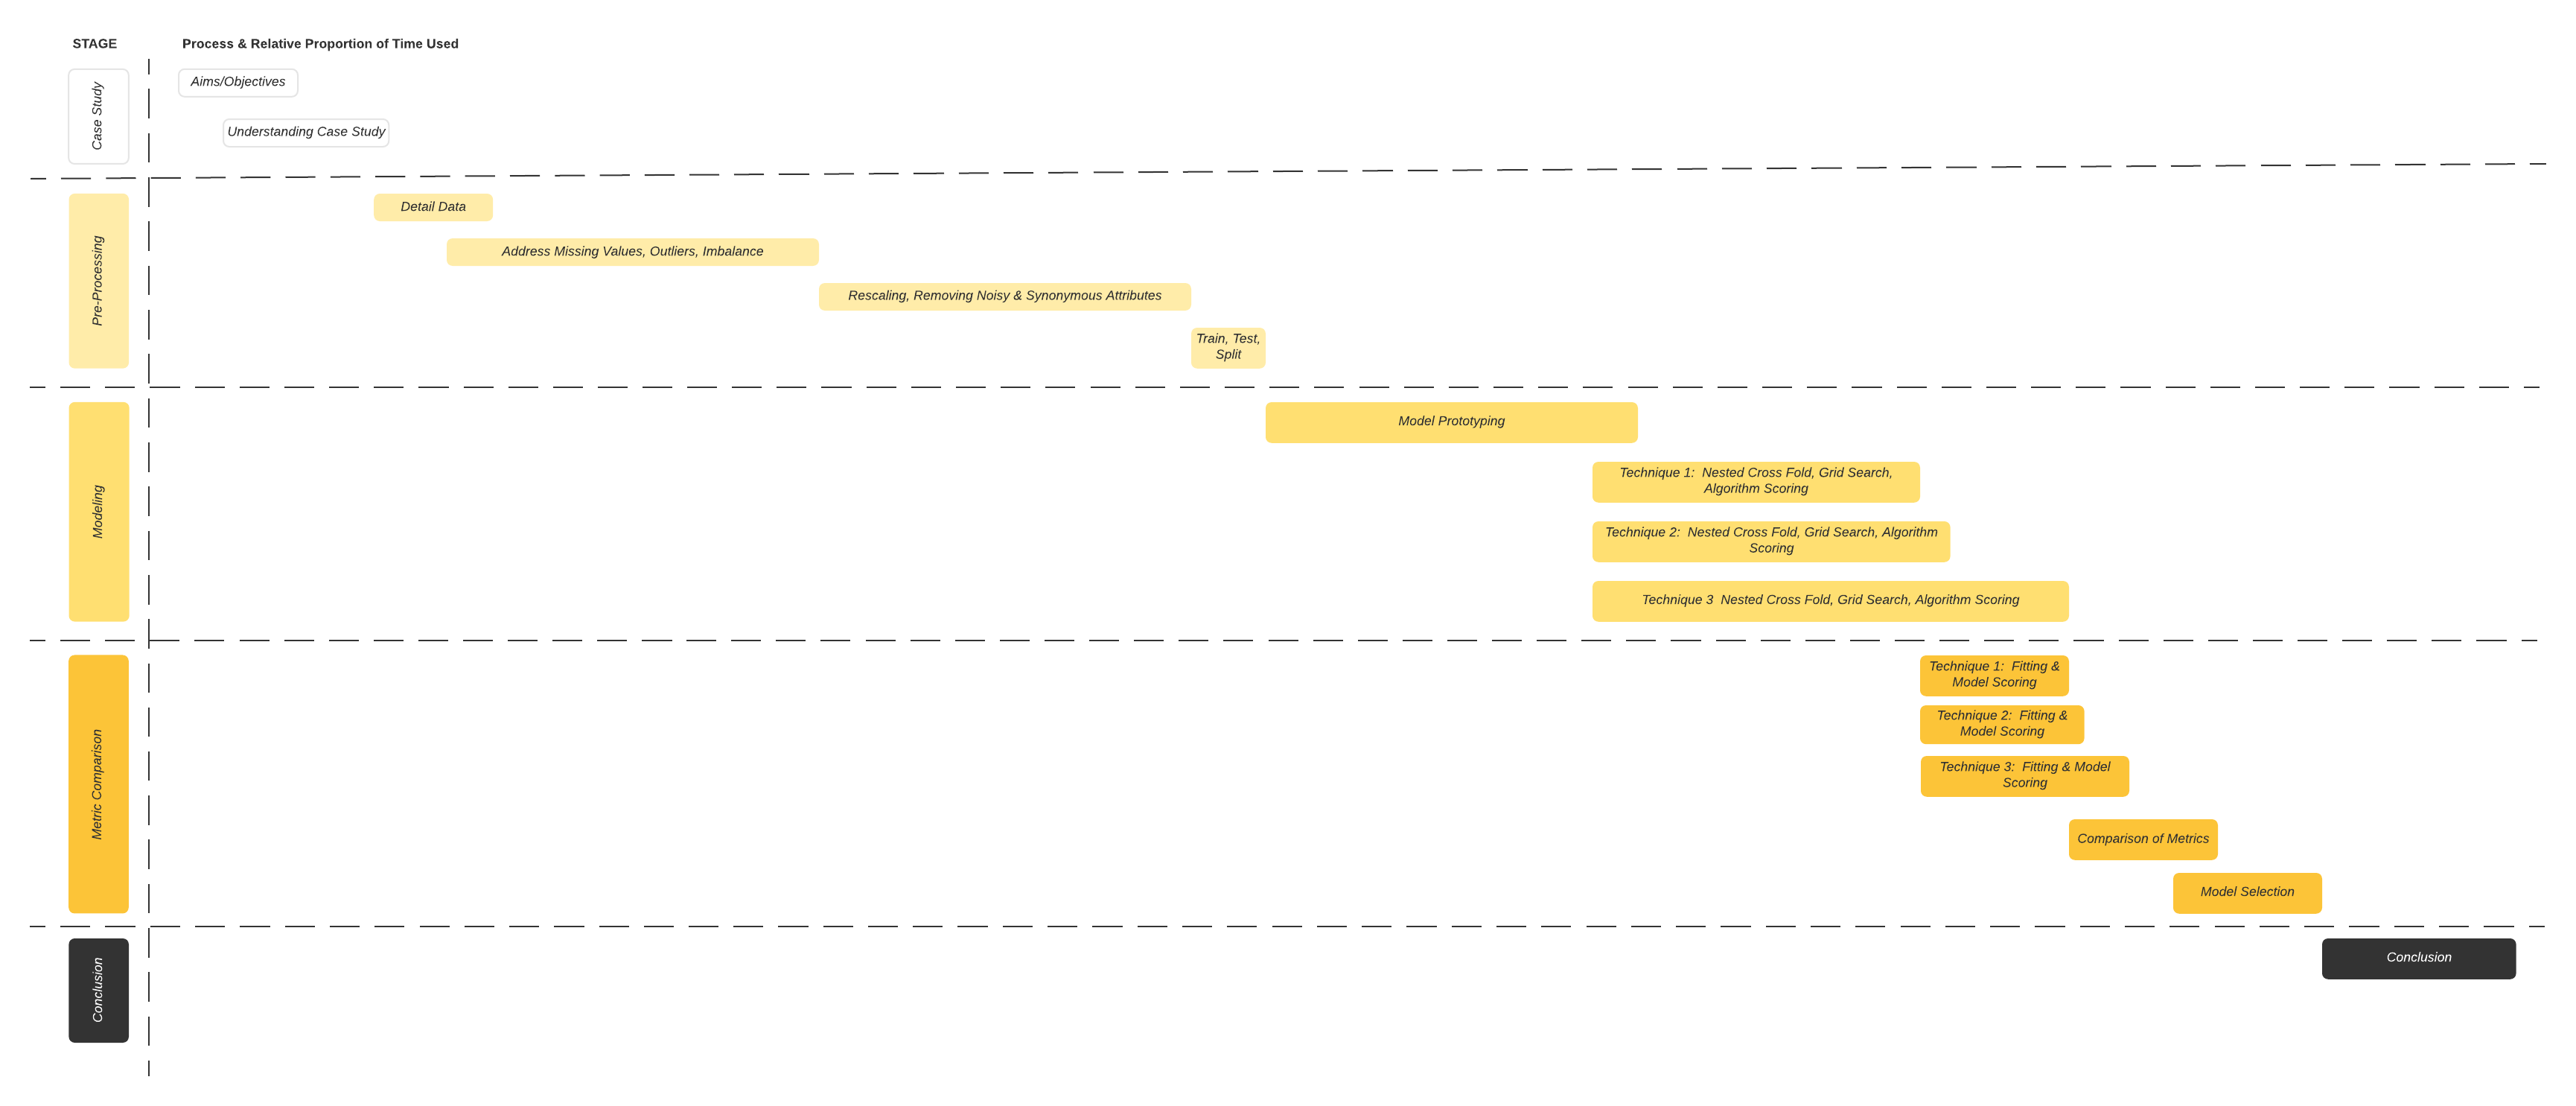

## <b>2. Understanding the Case Study</b>

###  2.1 Case Study Analysis

Before proceeding with our investigation, we restate the key points found in the case and how we intend to deal with them appropriately to address the bank's needs.

1. **Historical Data** - The bank provided historical data. As this data is all we have to work with, we will move forward presuming it is still relevant to current practice. 
<br />
<br />
2. **Identify Cases of Fraud** - Presumably, fraud occurs less often than normal transactions. We may need to balance the data so that our visualizations, calculations, and models are not biased.
<br />
<br />
3. **Adjust Positive Class** - A cursory look at the dataset indicates that Normal Transactions are labeled 1 and Fraudulent transactions are labeled 0. As we are attempting to identify cases of Fraud, we should assign fraud to the positive class.
<br />
<br /> 
4. **Minimize False Negatives** - False Negatives are costly as these constitute fraudulent transactions that we did not identify, allowing the fraud to continue. We can minimize false negatives by favoring True Positives, perhaps by focusing on maximizing our Recall Score.
<br />
<br />
5. **Minimize False Positives** - Conversely, we also must Minimize False Positives. While not as costly, false positives represent a false accusation against an honest customer. We take false positives into consideration by watching our model's precision.
<br />
<br />
6. **Budgets** - It is important to remain aware of budgets. We note that the allotted budgets make it clear that avoiding False Negatives is the top priority:
  * False Positives cost \$1k with a \$30k annual budget
  * False Negatives cost \$10k with a \$50k annual budget

## <b>3. Imports & Pre-Processing </b>

### 3.1 Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Prep & Feature Selection
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split

# Metrics & Reporting
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

### 3.2 Load & Detail Data
First, we will load the data and take a cursory look at the values. We've hosted the dataset online so that it does not need to be accessed locally.

In [ ]:
# read csv to dataframe named df
df = pd.read_csv('https://drive.google.com/uc?id=1bFTTCyJ9gJyqJQMofdVvB4QCqQVvrqs3')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V28.1,Amount,Normal
0,18088,NaN,3.854150,-12.466766,9.648311,-2.726961,-4.445610,-21.922811,0.320792,-4.433162,-11.201400,9.328799,-13.104933,0.888481,-10.140200,0.713465,-10.098671,-17.506612,-8.061208,1.606870,-2.147181,-1.159830,-1.504119,-19.254328,0.544867,-4.781606,-0.007772,3.052358,-0.775036,-0.775036,1218.89,0
1,101051,NaN,-1.093377,-0.059768,1.064785,11.095089,-5.430971,-9.378025,-0.446456,1.992110,1.785922,1.368585,-1.471697,-0.724759,3.442422,-0.957403,-1.626129,1.418215,-1.417917,-1.651766,-1.457610,1.160623,-1.259697,-15.981649,-0.883670,-3.536716,-0.592965,0.675525,0.424849,0.424849,0.92,0
2,132688,NaN,1.861373,-4.310353,2.448080,4.574094,-2.979912,-2.792379,-2.719867,-0.276704,-2.314747,2.222960,-0.407550,-1.652312,-5.871438,-0.427647,1.679873,5.540865,3.207637,-0.559480,0.318853,-1.384477,-0.348904,-3.979948,-0.828156,-2.419446,-0.767070,0.387039,0.319402,0.319402,1.00,0
3,95559,NaN,11.614801,-19.739386,10.463866,-12.599146,-1.202393,-23.380508,-5.781133,-7.811022,-16.303538,5.573625,-13.635216,-0.483236,-7.352792,-2.392684,-8.728142,-17.598854,-7.455956,0.169741,2.106034,-4.884983,1.140910,1.392953,0.348997,-2.167510,-0.798754,-2.942775,-0.462680,-0.462680,1.63,0
4,58642,-0.451383,2.225147,-4.953050,4.342228,-3.656190,-0.020121,-5.407554,-0.748436,-1.362198,-4.170623,3.762306,-4.226225,-2.046694,-4.710498,0.217572,-4.739084,-6.131887,-2.425871,2.314165,0.724381,-0.575924,0.495889,1.154128,-0.016186,-2.079928,-0.554377,0.455179,0.001321,0.001321,113.92,0


After viewing `df.info()` below, we note that there are 9997 total entries. We also notice that `V1` has a total of 4 missing values that we will need to address.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9997 entries, 0 to 9996
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    9997 non-null   int64  
 1   V1      9993 non-null   float64
 2   V2      9997 non-null   float64
 3   V3      9997 non-null   float64
 4   V4      9997 non-null   float64
 5   V5      9997 non-null   float64
 6   V6      9997 non-null   float64
 7   V7      9997 non-null   float64
 8   V8      9997 non-null   float64
 9   V9      9997 non-null   float64
 10  V10     9997 non-null   float64
 11  V11     9997 non-null   float64
 12  V12     9997 non-null   float64
 13  V13     9997 non-null   float64
 14  V14     9997 non-null   float64
 15  V15     9997 non-null   float64
 16  V16     9997 non-null   float64
 17  V17     9997 non-null   float64
 18  V18     9997 non-null   float64
 19  V19     9997 non-null   float64
 20  V20     9997 non-null   float64
 21  V21     9997 non-null   float64
 22  

A quick look at `df.describe()` also helps us understand the difference of scale that each feature's values represent. For example, we note that the max for features `V20` and `Amount` are far higher than `V1`. This indicates that we may need to rescale the data.

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V28.1,Amount,Normal
count,9997.000000,9993.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000
mean,117482.405122,-1.242894,-0.388124,-0.578172,0.385147,0.175060,0.036553,-0.147936,-0.225813,-0.206448,-0.199111,0.049287,-0.312208,0.049831,-0.329504,-0.096168,-0.313560,-0.282324,-0.065295,0.146616,0.008184,0.118541,0.263301,-0.093483,-0.029535,-1.295028,-0.071748,0.038500,0.039641,0.039641,207.815347,0.950785
std,41963.235383,3.061600,3.543063,2.781635,2.118301,2.584163,1.833762,2.874139,2.511277,1.346458,1.983392,1.418662,1.939997,0.993713,2.035587,1.062798,1.571963,2.259509,1.238329,1.230640,1.730727,1.406228,1.045465,1.984314,0.661193,0.567101,0.585584,0.845138,0.579283,0.579283,679.652086,0.216327
min,38.000000,-46.855047,-63.344698,-31.103685,-5.266509,-29.730600,-23.496714,-43.557242,-50.688419,-13.434066,-24.588262,-3.684586,-18.683715,-3.785719,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-23.420173,-22.889347,-10.933144,-44.807735,-2.727935,-10.295397,-2.604551,-22.565679,-11.710896,-11.710896,0.000000,0.000000
25%,89317.000000,-1.270388,-0.696123,-1.183218,-0.864526,-0.548204,-0.818892,-0.527063,-0.334373,-0.860413,-0.688936,-0.861593,-0.544243,-0.599901,-0.647428,-0.808565,-0.846624,-0.560746,-0.580695,-0.655430,-0.346456,-0.143437,-0.329913,0.013697,-0.400808,-1.479027,-0.461654,-0.111830,-0.040829,-0.040829,8.920000,1.000000
50%,130158.000000,-0.450542,0.253052,0.043928,-0.136180,0.250966,-0.098374,0.182848,0.030407,-0.126675,-0.096856,-0.049577,0.067554,0.042308,-0.019493,-0.111051,-0.162684,-0.014330,0.052701,0.071353,-0.080112,0.089671,0.259437,0.199210,0.031952,-1.207582,-0.079085,0.116164,0.135698,0.135698,34.950000,1.000000
75%,148479.000000,-0.028482,0.848351,0.856952,1.130185,1.087469,0.772079,0.817359,0.431064,0.553565,0.653108,0.686376,0.577834,0.701054,0.520247,0.618000,0.510768,0.482012,0.644404,0.847449,0.196626,0.391470,0.961447,0.405948,0.492264,-1.057593,0.263174,0.273851,0.264816,0.264816,125.900000,1.000000
max,172782.000000,2.132386,22.057729,9.382558,16.875344,34.099309,21.307738,31.527244,20.007208,15.594995,23.745136,12.018913,4.472921,4.369998,7.754599,5.825654,7.059132,6.739384,5.041069,5.228342,39.420904,27.202839,8.361985,5.466230,3.340880,2.208209,3.004455,10.507884,13.999688,13.999688,19656.530000,1.000000


In order to better understand the balance of our classifications, we'll define a helper function to visualize and display specific values. We will use this function several times.
<br />
<br />
The function visualizes our negative class as blue and our positive class as orange, for contrast. In subsequent visualizations, we can easily identify instances of our positive class as we will continue to set them as orange.

In [ ]:
# Helper Function to Visualize & View Balance of Data
def get_balance(df, label_col, pos_label, neg_label):
  # quantify the balance of classifcations
  pos_trans = df[df[label_col] == 1].shape[0]
  neg_trans = df[df[label_col] == 0].shape[0]

  pos_percent = round((pos_trans / len(df)) * 100, 2)
  neg_percent = round((neg_trans / len(df)) * 100, 2)

  plt.bar([f'{neg_label} (0)',f'{pos_label} (1)'], 
          [neg_trans, pos_trans],
          color=['tab:blue', 'tab:orange'])
  plt.show()

  print(f'{neg_label} (0): {neg_trans} Observations, {neg_percent} percent of dataset')
  print(f'{pos_label} (1): {pos_trans} Observations,  {pos_percent} percent of dataset')

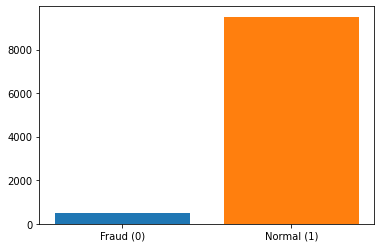

Fraud (0): 492 Observations, 4.92 percent of dataset
Normal (1): 9505 Observations,  95.08 percent of dataset


In [ ]:
get_balance(df, 'Normal', 'Normal', 'Fraud')

###  3.3 Preparing Labels
As we are attempting to detect instances of Fraud, it is counter-intuitive for Fraud to be mapped to the negative class. Below, we remap our labels so that the class we are trying to detect, Fraud, is indicated by 1. We also rename the column with a more generalized name.

In [ ]:
# remap labels and set to "Class" column
df['Class'] = df['Normal'].map({1: 0, 0: 1})

# drop unnecessary "Normal" column
df.drop(['Normal'], axis=1, inplace=True)

Below we can see that 0 now represents our "Normal" class and 1 now represents our "Fraud" class. As the positive label, "Fraud" is now orange. We will also note for future reference that the classes are quite imbalanced, with the majority of our dataset labeled "Normal."

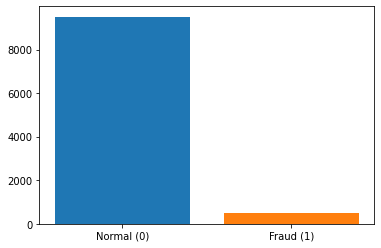

Normal (0): 9505 Observations, 95.08 percent of dataset
Fraud (1): 492 Observations,  4.92 percent of dataset


In [ ]:
# visualize new class balance w/ helper function
get_balance(df, 'Class', 'Fraud', 'Normal')

###  3.4 Addressing Missing Values
As noted above, our `V1` feature is missing four values, which do not represent a large portion of our dataset. While it is unfortunate that each missing value does represent an instance of Fraud, four of nearly five-hundred observations are unlikely to make a difference in our model.
<br />
<br />
If there were a significant number of Fraud cause with missing `V1` values, that may be a valuable indication of Fraud and we would consider other methods to deal with the missing values in models that require numeric input., However, in this case, we will simply remove these observations.

In [ ]:
# view observations with missing values
df[df.isnull().any(axis=1)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V28.1,Amount,Class
0,18088,NaN,3.854150,-12.466766,9.648311,-2.726961,-4.445610,-21.922811,0.320792,-4.433162,-11.201400,9.328799,-13.104933,0.888481,-10.140200,0.713465,-10.098671,-17.506612,-8.061208,1.606870,-2.147181,-1.159830,-1.504119,-19.254328,0.544867,-4.781606,-0.007772,3.052358,-0.775036,-0.775036,1218.89,1
1,101051,NaN,-1.093377,-0.059768,1.064785,11.095089,-5.430971,-9.378025,-0.446456,1.992110,1.785922,1.368585,-1.471697,-0.724759,3.442422,-0.957403,-1.626129,1.418215,-1.417917,-1.651766,-1.457610,1.160623,-1.259697,-15.981649,-0.883670,-3.536716,-0.592965,0.675525,0.424849,0.424849,0.92,1
2,132688,NaN,1.861373,-4.310353,2.448080,4.574094,-2.979912,-2.792379,-2.719867,-0.276704,-2.314747,2.222960,-0.407550,-1.652312,-5.871438,-0.427647,1.679873,5.540865,3.207637,-0.559480,0.318853,-1.384477,-0.348904,-3.979948,-0.828156,-2.419446,-0.767070,0.387039,0.319402,0.319402,1.00,1
3,95559,NaN,11.614801,-19.739386,10.463866,-12.599146,-1.202393,-23.380508,-5.781133,-7.811022,-16.303538,5.573625,-13.635216,-0.483236,-7.352792,-2.392684,-8.728142,-17.598854,-7.455956,0.169741,2.106034,-4.884983,1.140910,1.392953,0.348997,-2.167510,-0.798754,-2.942775,-0.462680,-0.462680,1.63,1


In [ ]:
# Drop rows where V1 = NaN
df.dropna(subset=['V1'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9993 entries, 4 to 9996
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    9993 non-null   int64  
 1   V1      9993 non-null   float64
 2   V2      9993 non-null   float64
 3   V3      9993 non-null   float64
 4   V4      9993 non-null   float64
 5   V5      9993 non-null   float64
 6   V6      9993 non-null   float64
 7   V7      9993 non-null   float64
 8   V8      9993 non-null   float64
 9   V9      9993 non-null   float64
 10  V10     9993 non-null   float64
 11  V11     9993 non-null   float64
 12  V12     9993 non-null   float64
 13  V13     9993 non-null   float64
 14  V14     9993 non-null   float64
 15  V15     9993 non-null   float64
 16  V16     9993 non-null   float64
 17  V17     9993 non-null   float64
 18  V18     9993 non-null   float64
 19  V19     9993 non-null   float64
 20  V20     9993 non-null   float64
 21  V21     9993 non-null   float64
 22  

### **3.5 Explore Outliers**

Taking potential outliers into consideration is important as they can contribute to bias in our models, with some models being more sensitive to outliers than others. Below, we explore potential outliers using our dataset's Interquartile Range, mostly for its simplicity of execution without additional libraries. IQR for outlier detection does appear to be a common and useful method regardless of the accessibility of alternatives.
<br />
<br />
Considering we removed NaN values rather than filling them with generated data, we are comfortable performing this step after addressing our NaN values. However, if we were to generate values to fill missing data--such as by using the column mean--we would want to do so without consideration for outliers and would consider performing outlier detection before addressing missing values.
regardless of the accessibility of alternatives.
<br />
<br />
Below, we calculate the IQR below on all columns except for "Normal."

In [ ]:
outlier_df = df.loc[:, df.columns != 'Class']

Q1 = outlier_df.quantile(0.25)
Q3 = outlier_df.quantile(0.75)

IQR = Q3 - Q1

print(IQR)

Time      59168.000000
V1            1.241906
V2            1.544064
V3            2.039456
V4            1.992649
V5            1.635578
V6            1.592046
V7            1.343659
V8            0.765461
V9            1.413752
V10           1.340872
V11           1.547589
V12           1.120615
V13           1.300844
V14           1.167400
V15           1.425664
V16           1.356754
V17           1.042679
V18           1.224290
V19           1.502879
V20           0.542924
V21           0.534571
V22           1.291342
V23           0.391686
V24           0.893039
V25           0.420972
V26           0.724387
V27           0.385578
V28           0.305346
V28.1         0.305346
Amount      116.970000
dtype: float64


After calculating the IQR, we can assign a True/False bool across our dataframe, indicating which values fall outside our IQR.

In [ ]:
print((outlier_df < (Q1 - 1.5 * IQR)) | (outlier_df > (Q3 + 1.5 * IQR)))

       Time     V1     V2     V3     V4  ...    V26    V27    V28  V28.1  Amount
4     False  False  False   True   True  ...  False  False  False  False   False
5     False  False  False   True  False  ...  False  False  False  False   False
6     False  False  False   True   True  ...  False  False  False  False   False
7     False  False  False   True   True  ...  False  False  False  False   False
8     False  False  False   True   True  ...  False  False  False  False   False
...     ...    ...    ...    ...    ...  ...    ...    ...    ...    ...     ...
9992  False  False  False  False  False  ...  False  False  False  False   False
9993  False  False  False  False  False  ...  False  False  False  False   False
9994  False  False  False  False   True  ...  False  False  False  False   False
9995  False  False  False  False  False  ...  False  False  False  False   False
9996  False  False  False  False  False  ...  False  False  False  False   False

[9993 rows x 31 columns]


Finally, we filter the dataframe and re-join our labels.

In [ ]:
df_outlied = outlier_df[~((df < (Q1 - 1.5 * IQR)) | (outlier_df > (Q3 + 1.5 * IQR))).any(axis=1)]

df_outlied = df_outlied.join(df.loc[:,'Class'])

df_outlied.shape

(5131, 32)

Assessing outliers via the IQR relative to the dataset as a whole, we realize that, although a large number of normal transactions were identified as outliers, a far larger proportion of fraudulent transactions were identified as outliers. That is, while 46.07% of normal transactions were identified as outliers, 98.98% of fraudulent transactions were identified as outliers. This indicates that fraudulent activity itself is outlying behavior. 
<br />
<br />
We cannot remove outliers based on this method. For the time being, we will move forward without outlier removal. Should our models underperform, we may revisit outlier removal with a new strategy. 
<br /> 
<br /> 
One alternative strategy may be to remove outliers via the IQR relative to each individual class--that is, remove outliers within our negative class separately from removing outliers within our positive class. 

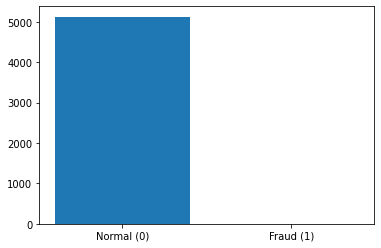

Normal (0): 5126 Observations, 99.9 percent of dataset
Fraud (1): 5 Observations,  0.1 percent of dataset


In [ ]:
# view balance with outliers removed, via helper function
get_balance(df_outlied, 'Class', 'Fraud', 'Normal')

###  3.6 Address Imbalance
Below, we balance the dataset so that the large imbalance in our target variable, "Class" does not bias our explorations, visualizations, or models. We balance the dataset by undersampling the negative class to match the number of positive observations available.  

In [ ]:
# save n_fraud to pass into our subset process below
n_fraud = df.loc[df['Class'] == 1]['Class'].count()

n_fraud

488

In [ ]:
# set random_state for consistency in subsequent experiments
df_sample = df.sample(frac=1, random_state=4)

# sample an equal number of fraud and non-fraud observations
normal_df = df_sample.loc[df_sample['Class'] == 0][:n_fraud]
fraud_df = df_sample.loc[df_sample['Class'] == 1]

# recombined sampled data
distributed_df = pd.concat([fraud_df, normal_df])

# sample dataframe rows
balanced_df = distributed_df.sample(frac=1, random_state=89)

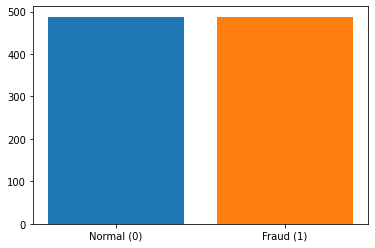

Normal (0): 488 Observations, 50.0 percent of dataset
Fraud (1): 488 Observations,  50.0 percent of dataset


In [ ]:
# confirm balanced dataset via helper function
get_balance(balanced_df, 'Class', 'Fraud', 'Normal')

###  3.7 Rescaling
As we noted above, when we viewed `df.describe()`, although our dataset underwent a PCA transformation, the features have varying ranges of scale that may bias our model in favor of features that are defined by larger values. With that in mind, scaling our features is necessary. We will use MinMax scaling to place all of our values on a 0-1 scale.
<br/> 
<br/> 
This initial scaling process is solely for the purpose of exploring our dataset for feature selection—removing synonymous and noisy attributes. We will not build models with this scaled dataset
<br />
<br />
Once we have selected our features, we will filter our un-scaled, balanced dataset before train, test, split. Scaling for our models will take place within our Crossfold Validation process to avoid data leakage.

In [ ]:
# instantiate scaler
scaler = preprocessing.MinMaxScaler()

# make a copy as we will only use scaled_df to expore feature selection
scaled_df = balanced_df.copy()

# fit & transform our new dataframe
scaled_df[scaled_df.columns] = scaler.fit_transform(scaled_df)

scaled_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V28.1,Amount,Class
303,0.395669,0.531125,0.806869,0.632702,0.428807,0.480243,0.946484,0.479178,0.060454,0.711269,0.655765,0.469318,0.653541,0.225083,0.410181,0.577027,0.458513,0.592895,0.477799,0.436263,0.391845,1.000000,0.000000,0.995024,0.378658,0.756674,0.361803,0.676385,0.644837,0.644837,0.000230,1.0
57,0.547580,0.125277,0.884180,0.027651,0.791477,0.116920,0.510648,0.238754,0.484924,0.216584,0.080601,0.470238,0.375761,0.413579,0.618332,0.283417,0.423866,0.398107,0.300826,0.368800,0.655354,0.280836,0.715862,0.860176,0.622520,0.631409,0.170020,0.000000,0.462036,0.462036,0.000230,1.0
79,0.825891,0.898987,0.579351,0.853328,0.568018,0.605220,0.672361,0.856051,0.670343,0.607523,0.811140,0.327731,0.716974,0.436588,0.568736,0.614431,0.759015,0.737137,0.724295,0.628733,0.525314,0.448086,0.474133,0.847164,0.531590,0.655609,0.389452,0.556653,0.505940,0.505940,0.074600,1.0
440,0.947286,0.774476,0.553514,0.755742,0.322195,0.603375,0.557463,0.758784,0.660903,0.570564,0.639766,0.286154,0.643074,0.334597,0.659790,0.645623,0.497426,0.560207,0.346223,0.397040,0.529330,0.449425,0.602716,0.826135,0.486020,0.835469,0.579735,0.643496,0.491132,0.491132,0.009188,1.0
240,0.882183,0.732273,0.620439,0.739864,0.332926,0.544749,0.469558,0.767643,0.682338,0.651794,0.661934,0.396320,0.590458,0.531612,0.424264,0.712404,0.590085,0.564174,0.531571,0.456262,0.497963,0.488680,0.517464,0.841256,0.767547,0.731740,0.420741,0.413857,0.682437,0.682437,0.013268,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9843,0.379959,0.922932,0.554437,0.979580,0.259798,0.636071,0.658386,0.851085,0.676993,0.710546,0.818143,0.217303,0.870027,0.422443,0.790919,0.916918,0.727662,0.820341,0.558283,0.305171,0.534160,0.455763,0.529413,0.838499,0.366407,0.601569,0.261815,0.582556,0.564117,0.564117,0.002296,0.0
9900,0.824590,0.935892,0.552156,0.955987,0.195076,0.633603,0.654877,0.842833,0.675178,0.742268,0.805680,0.184313,0.873766,0.617123,0.710683,0.678160,0.871453,0.784896,0.830182,0.553065,0.547985,0.455943,0.530854,0.829193,0.438998,0.601843,0.481412,0.579680,0.568766,0.568766,0.003445,0.0
477,0.155935,0.244477,0.815679,0.192818,0.617955,0.144312,0.306729,0.516667,0.917248,0.521502,0.537314,0.528589,0.524307,0.607845,0.470653,0.603407,0.444429,0.386091,0.348620,0.546344,0.605588,0.491267,0.420401,0.802197,0.590924,0.918826,0.336480,0.695001,0.604997,0.604997,0.022980,1.0
446,0.487013,0.921504,0.591120,0.809113,0.529542,0.563637,0.550629,0.751474,0.693341,0.583003,0.636080,0.464922,0.558573,0.477785,0.392691,0.419015,0.537336,0.475094,0.504862,0.537648,0.568961,0.470219,0.491510,0.822925,0.333720,0.844202,0.430770,0.662510,0.612685,0.612685,0.000230,1.0


###  3.8 Addressing Noisy & Synonymous Attributes
Below, we employ Low Variance Filtering and High Correlation Filtering in order to identify noisy and synonymous features, respectively.

#### 3.8.1 Low Variance Filtering
Variables with a minimal spread of values relative to their mean will not offer much information by which the models can differentiate. Variables that do not offer much usable information to the model constitute noisy attributes.
<br />
<br />
Below we look at the various variance values for our dataset. As our dataset has been obfuscated, scaled, and we have no domain knowledge, we cannot specifically identify features of low variance in terms of how they are used by the contracting organization. However, we can start by filtering out features with the lowest variance relative to the rest of the dataset.

In [ ]:
scaled_df.var()

Time      0.080787
V1        0.027213
V2        0.007630
V3        0.033903
V4        0.043826
V5        0.015099
V6        0.013866
V7        0.013151
V8        0.006873
V9        0.015530
V10       0.023459
V11       0.038780
V12       0.045376
V13       0.025808
V14       0.035771
V15       0.020057
V16       0.039998
V17       0.035084
V18       0.033031
V19       0.023631
V20       0.003448
V21       0.003312
V22       0.005559
V23       0.002209
V24       0.025815
V25       0.013873
V26       0.014150
V27       0.007729
V28       0.002049
V28.1     0.002049
Amount    0.008324
Class     0.250256
dtype: float64

Next, we set our Variance Threshold to .01, which will filter out our bottom nine features.  If our models underperform, we may return and adjust this parameter and re-test. Again, this is somewhat arbitrary. We are simply removing features with the lowest variance relative to the other available features.

In [ ]:
# columns with < .01 variance will be labeled False
varthresh = VarianceThreshold(threshold = .01)

varience_filtered_df = scaled_df

# indicate the target column to be ignored
varthresh.fit(varience_filtered_df, varience_filtered_df['Class'])

# get_support assigns True/False Bool to columns based on VarianceThreshold()
var_selected = varience_filtered_df.loc[:, varthresh.get_support()]

# we will use var_selected.columns as a method to filter our model dataframe
var_selected

,Time,V1,V3,V4,V5,V6,V7,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V24,V25,V26,Class
303,0.395669,0.531125,0.632702,0.428807,0.480243,0.946484,0.479178,0.711269,0.655765,0.469318,0.653541,0.225083,0.410181,0.577027,0.458513,0.592895,0.477799,0.436263,0.378658,0.756674,0.361803,1.0
57,0.547580,0.125277,0.027651,0.791477,0.116920,0.510648,0.238754,0.216584,0.080601,0.470238,0.375761,0.413579,0.618332,0.283417,0.423866,0.398107,0.300826,0.368800,0.622520,0.631409,0.170020,1.0
79,0.825891,0.898987,0.853328,0.568018,0.605220,0.672361,0.856051,0.607523,0.811140,0.327731,0.716974,0.436588,0.568736,0.614431,0.759015,0.737137,0.724295,0.628733,0.531590,0.655609,0.389452,1.0
440,0.947286,0.774476,0.755742,0.322195,0.603375,0.557463,0.758784,0.570564,0.639766,0.286154,0.643074,0.334597,0.659790,0.645623,0.497426,0.560207,0.346223,0.397040,0.486020,0.835469,0.579735,1.0
240,0.882183,0.732273,0.739864,0.332926,0.544749,0.469558,0.767643,0.651794,0.661934,0.396320,0.590458,0.531612,0.424264,0.712404,0.590085,0.564174,0.531571,0.456262,0.767547,0.731740,0.420741,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9843,0.379959,0.922932,0.979580,0.259798,0.636071,0.658386,0.851085,0.710546,0.818143,0.217303,0.870027,0.422443,0.790919,0.916918,0.727662,0.820341,0.558283,0.305171,0.366407,0.601569,0.261815,0.0
9900,0.824590,0.935892,0.955987,0.195076,0.633603,0.654877,0.842833,0.742268,0.805680,0.184313,0.873766,0.617123,0.710683,0.678160,0.871453,0.784896,0.830182,0.553065,0.438998,0.601843,0.481412,0.0
477,0.155935,0.244477,0.192818,0.617955,0.144312,0.306729,0.516667,0.521502,0.537314,0.528589,0.524307,0.607845,0.470653,0.603407,0.444429,0.386091,0.348620,0.546344,0.590924,0.918826,0.336480,1.0
446,0.487013,0.921504,0.809113,0.529542,0.563637,0.550629,0.751474,0.583003,0.636080,0.464922,0.558573,0.477785,0.392691,0.419015,0.537336,0.475094,0.504862,0.537648,0.333720,0.844202,0.430770,1.0


#### 3.8.2 High Correlation Filtering
As we attempt to solve a binary classification problem, we are not particularly looking for linear relationships for the models themselves. Our models will be more concerned with separability of the "Fraud" and "Normal" classes. We will, however, attempt to identify synonyms features through their linear relationships and class distributions.
<br />
<br />
Pearson's Correlation Coefficient is a useful indication of linear correlation but in seeking synonymous features, we must also consider whether or not the distribution of our class within each correlated feature is also similar.
<br />
<br />
To aid our assessment, we define a helper function below to plot our feature correlations in a heat map matrix. Values close to 1 indicate a high positive correlation, values close to -1 indicate a high negative correlation, and values near 0 represent no correlation.

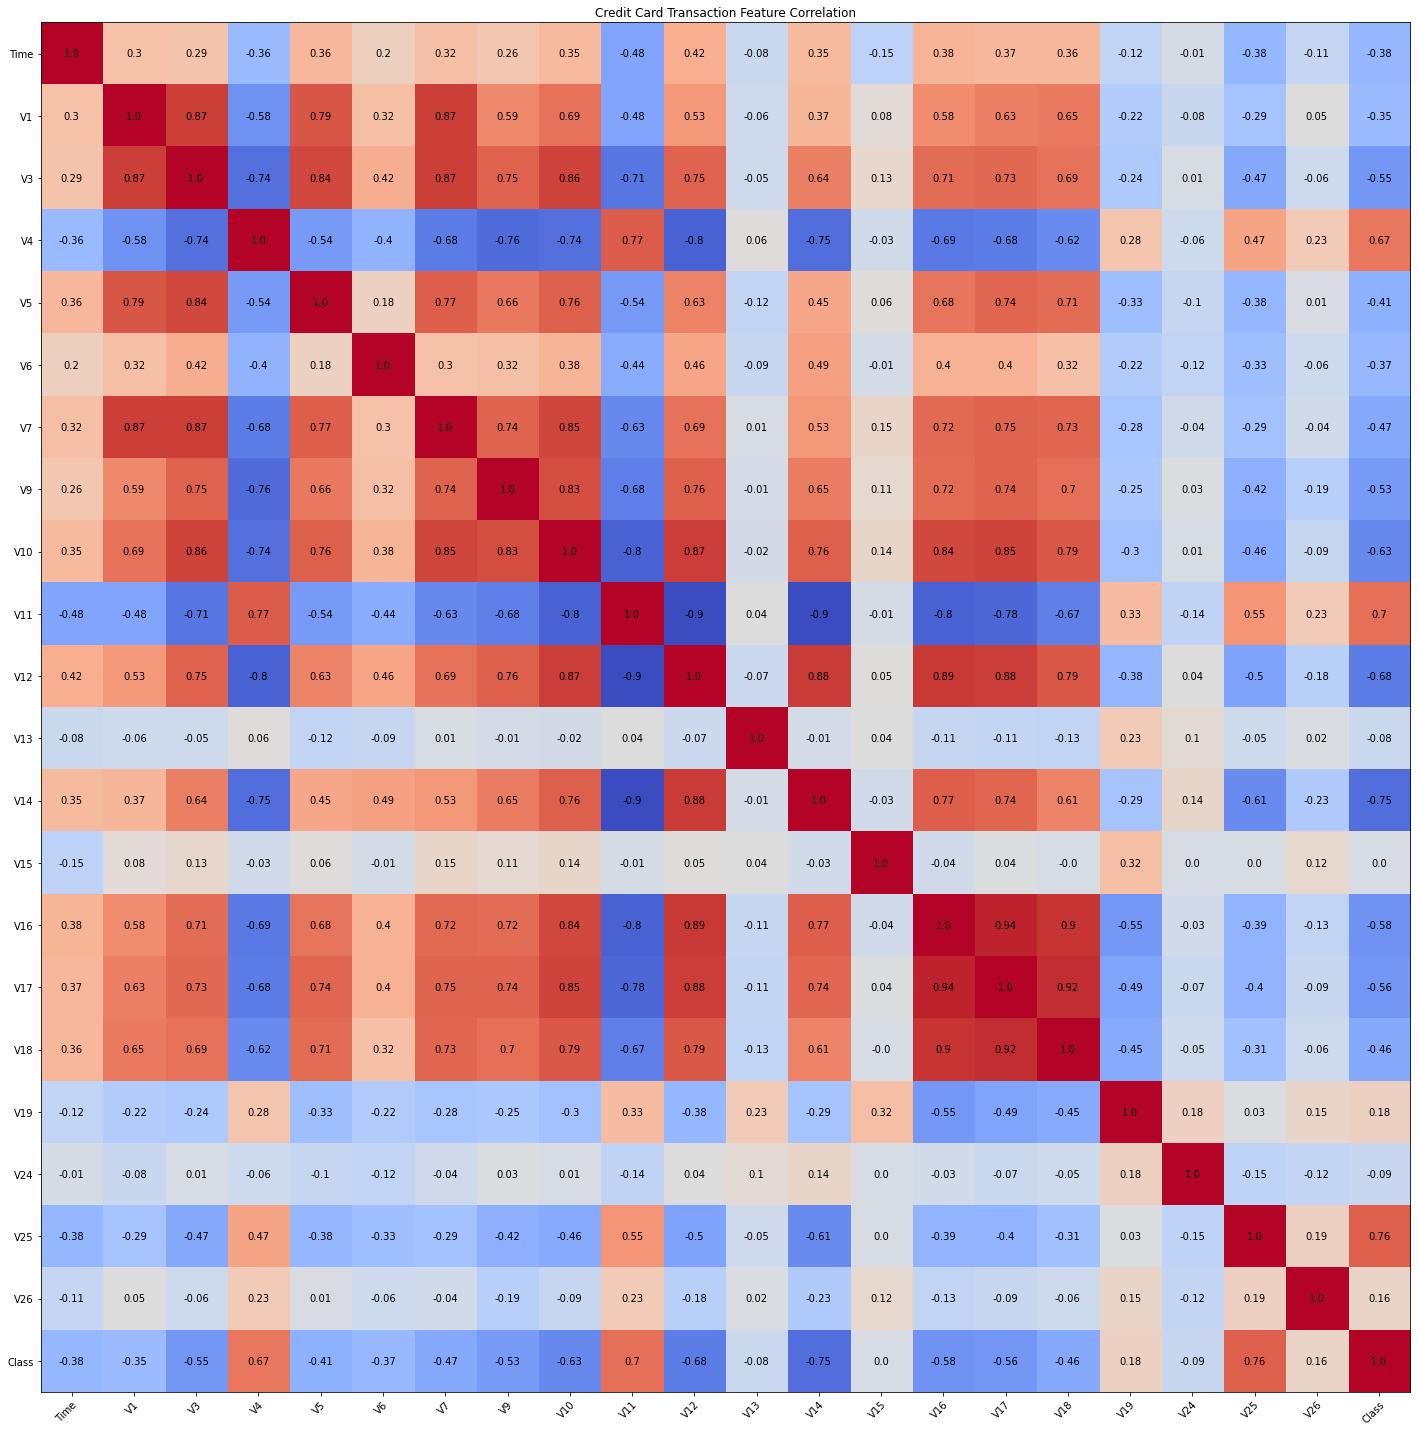

In [ ]:
# Entire DataFrame
subset_corr = var_selected.corr()

fig, ax = plt.subplots(figsize=(20, 20))
im = ax.imshow(subset_corr, cmap="coolwarm")

# show all ticks
ax.set_xticks(np.arange(len(subset_corr.columns)))
ax.set_yticks(np.arange(len(subset_corr.columns)))
# label them
ax.set_xticklabels(subset_corr.columns)
ax.set_yticklabels(subset_corr.columns)

# rotate tick labels and set alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# loop and create text annotations
for i in range(len(subset_corr.columns)):
    for j in range(len(subset_corr.columns)):
        text = ax.text(j, i, round(subset_corr.iat[i, j],2),
                       ha="center", va="center", color="black")

ax.set_title("Credit Card Transaction Feature Correlation")
ax.grid(False)

fig.tight_layout()
plt.show()

Below we define two lists of features. Our `neg_corr_list` includes features with a <= -.88 correlation while our `pos_corr_list` includes features with a >= .88 correlation. 
<br />
<br />
We selected these thresholds as arbitrarily high positive and negative correlations with the intent to adjust if further investigation does not offer evidence of strong correlations.

In [ ]:
# <= -.88 correlation
neg_corr_list = [['V11', 'V12'],
                 ['V11', 'V14']]

# >= .88 correlation
pos_corr_list = [['V12', 'V14'], 
                 ['V12', 'V16'], 
                 ['V12', 'V17'], 
                 ['V16', 'V17'], 
                 ['V16', 'V18'],
                 ['V17', 'V18'] ]

In [ ]:
# generate sets for pairplots
neg_corr_set = set()
pos_corr_set = set()

for i in neg_corr_list:
  for f in i:
    neg_corr_set.add(f)

for i in pos_corr_list:
  for f in i:
    pos_corr_set.add(f)

neg_corr_set.add('Class')
pos_corr_set.add('Class')

Next, we write a helper function to plot selected features against each other using scatterplots with hues for the class. When features are paired with themselves, we use a histogram to visualize the distribution of that feature, separated by class.

In [ ]:
# Helper Function to Generate Pairplots
def mat_pairplot(df, target_col):
  colors = {0:'tab:blue', 1:'tab:orange'}

  fig, axs = plt.subplots(len(df.columns), len(df.columns), figsize=(30, 30))

  for i, ax in enumerate(axs):
    for e, subax in enumerate(ax):

      if df.columns[i] == df.columns[e]:
        # trying to plot one column based on the value of Normal
        subax.hist(df.loc[df[target_col] == 0, df.columns[i]], 
                  bins=50, 
                  color='tab:blue',
                  alpha=0.5)
        subax.hist(df.loc[df[target_col] == 1, df.columns[i]], 
                  bins=50, 
                  color='tab:orange',
                  alpha=0.5)      
      
      else:                                        
        subax.scatter(df[df.columns[i]], 
                      df[df.columns[e]], 
                      c=df[target_col].map(colors), 
                      alpha=0.2)
        
  for ax, col in zip(axs[0], df.columns):
    ax.set_title(col)

  for ax, row in zip(axs[:,0], df.columns):
    ax.set_ylabel(row, rotation=0, size='large')

  plt.tight_layout()
  plt.show()  

First, we plot our negatively correlated features. We can see below that while our feature sets `[['V11', 'V12'], ['V11', 'V14']]` have a high negative correlation, their class distributions are opposites. These features are not synonymous.
<br />
<br />
We notice, for example, that while `V11` & `V1` have a high negative correlation, their class labels are not similarly distributed. As such, both may provide useful information to our model, so we will keep both in terms of this relationship. The `V11` & `V14` relationship is similar. 

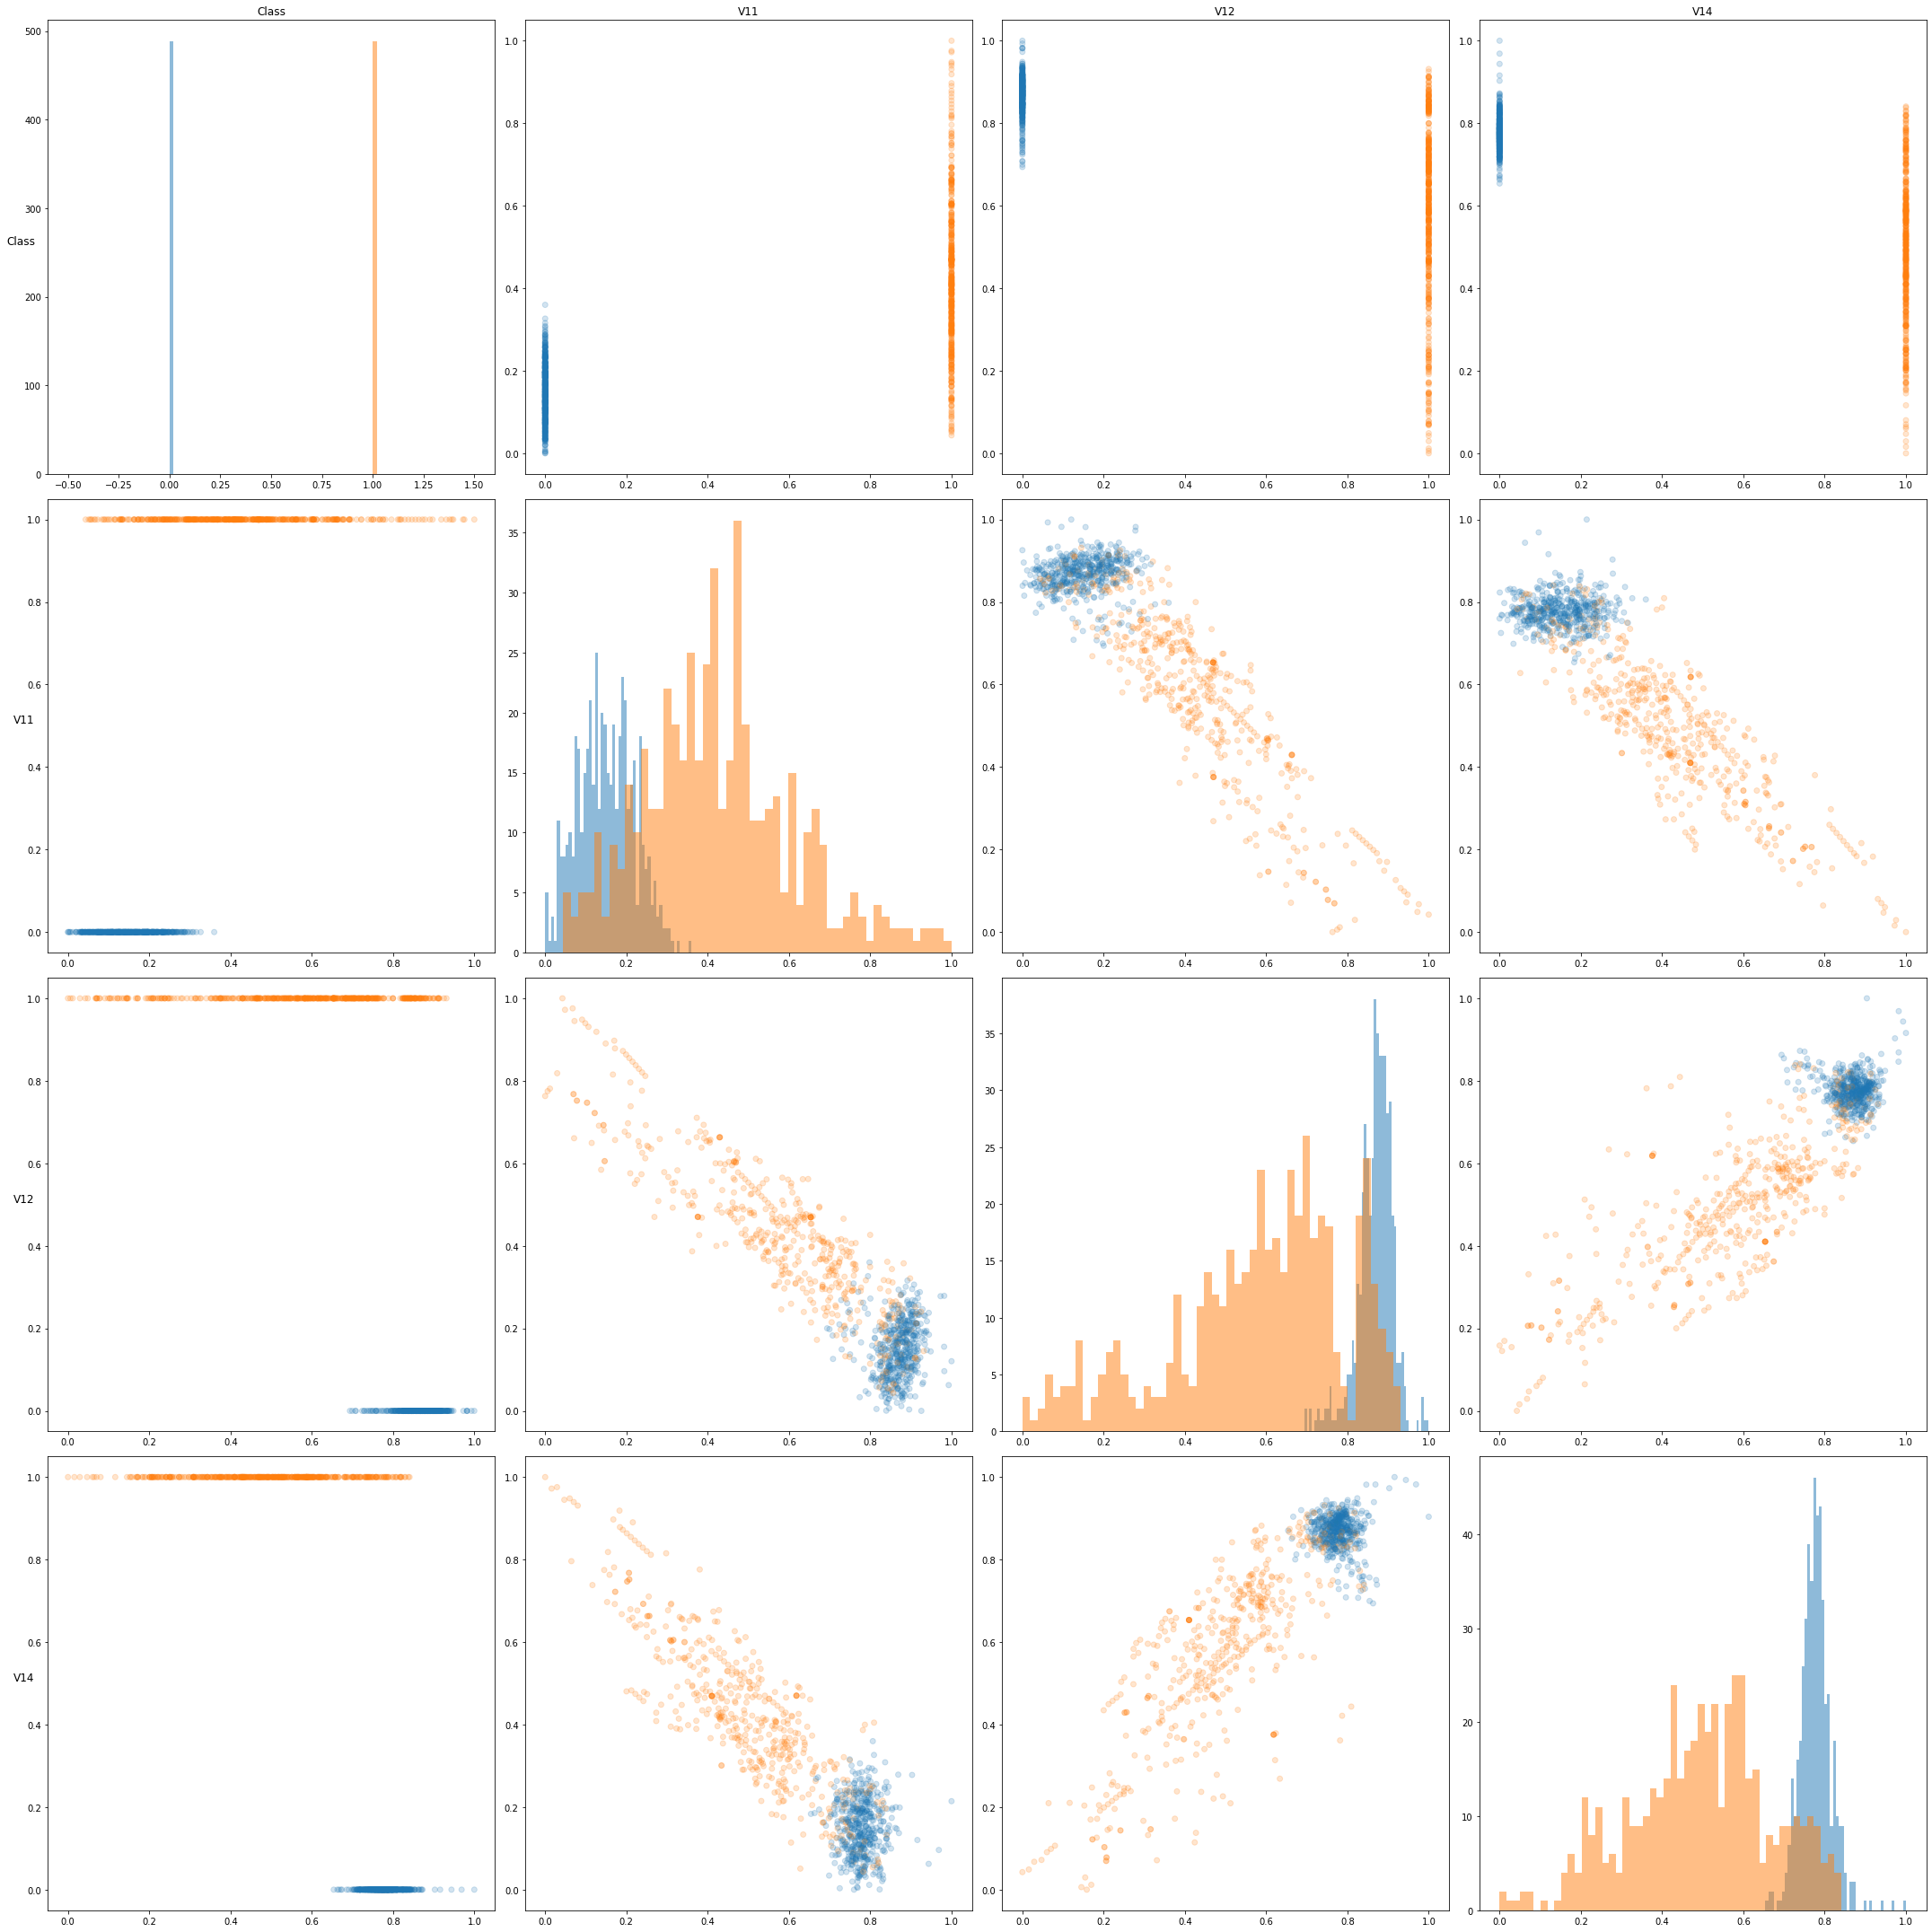

In [ ]:
# pairplot for features with a high negative correlation
mat_pairplot(var_selected[sorted(neg_corr_set)], 'Class')

Next, we plot our features with a high positive correlation: 

```[['V12', 'V14'], ['V12', 'V16'], ['V12', 'V17'], ['V16', 'V17'], ['V16', 'V18'],['V17', 'V18'] ]```
<br />
<br />
We notice that our positively correlated features have not only a high linear correlation but also a similar class distribution and can be considered synonymous for our purposes.

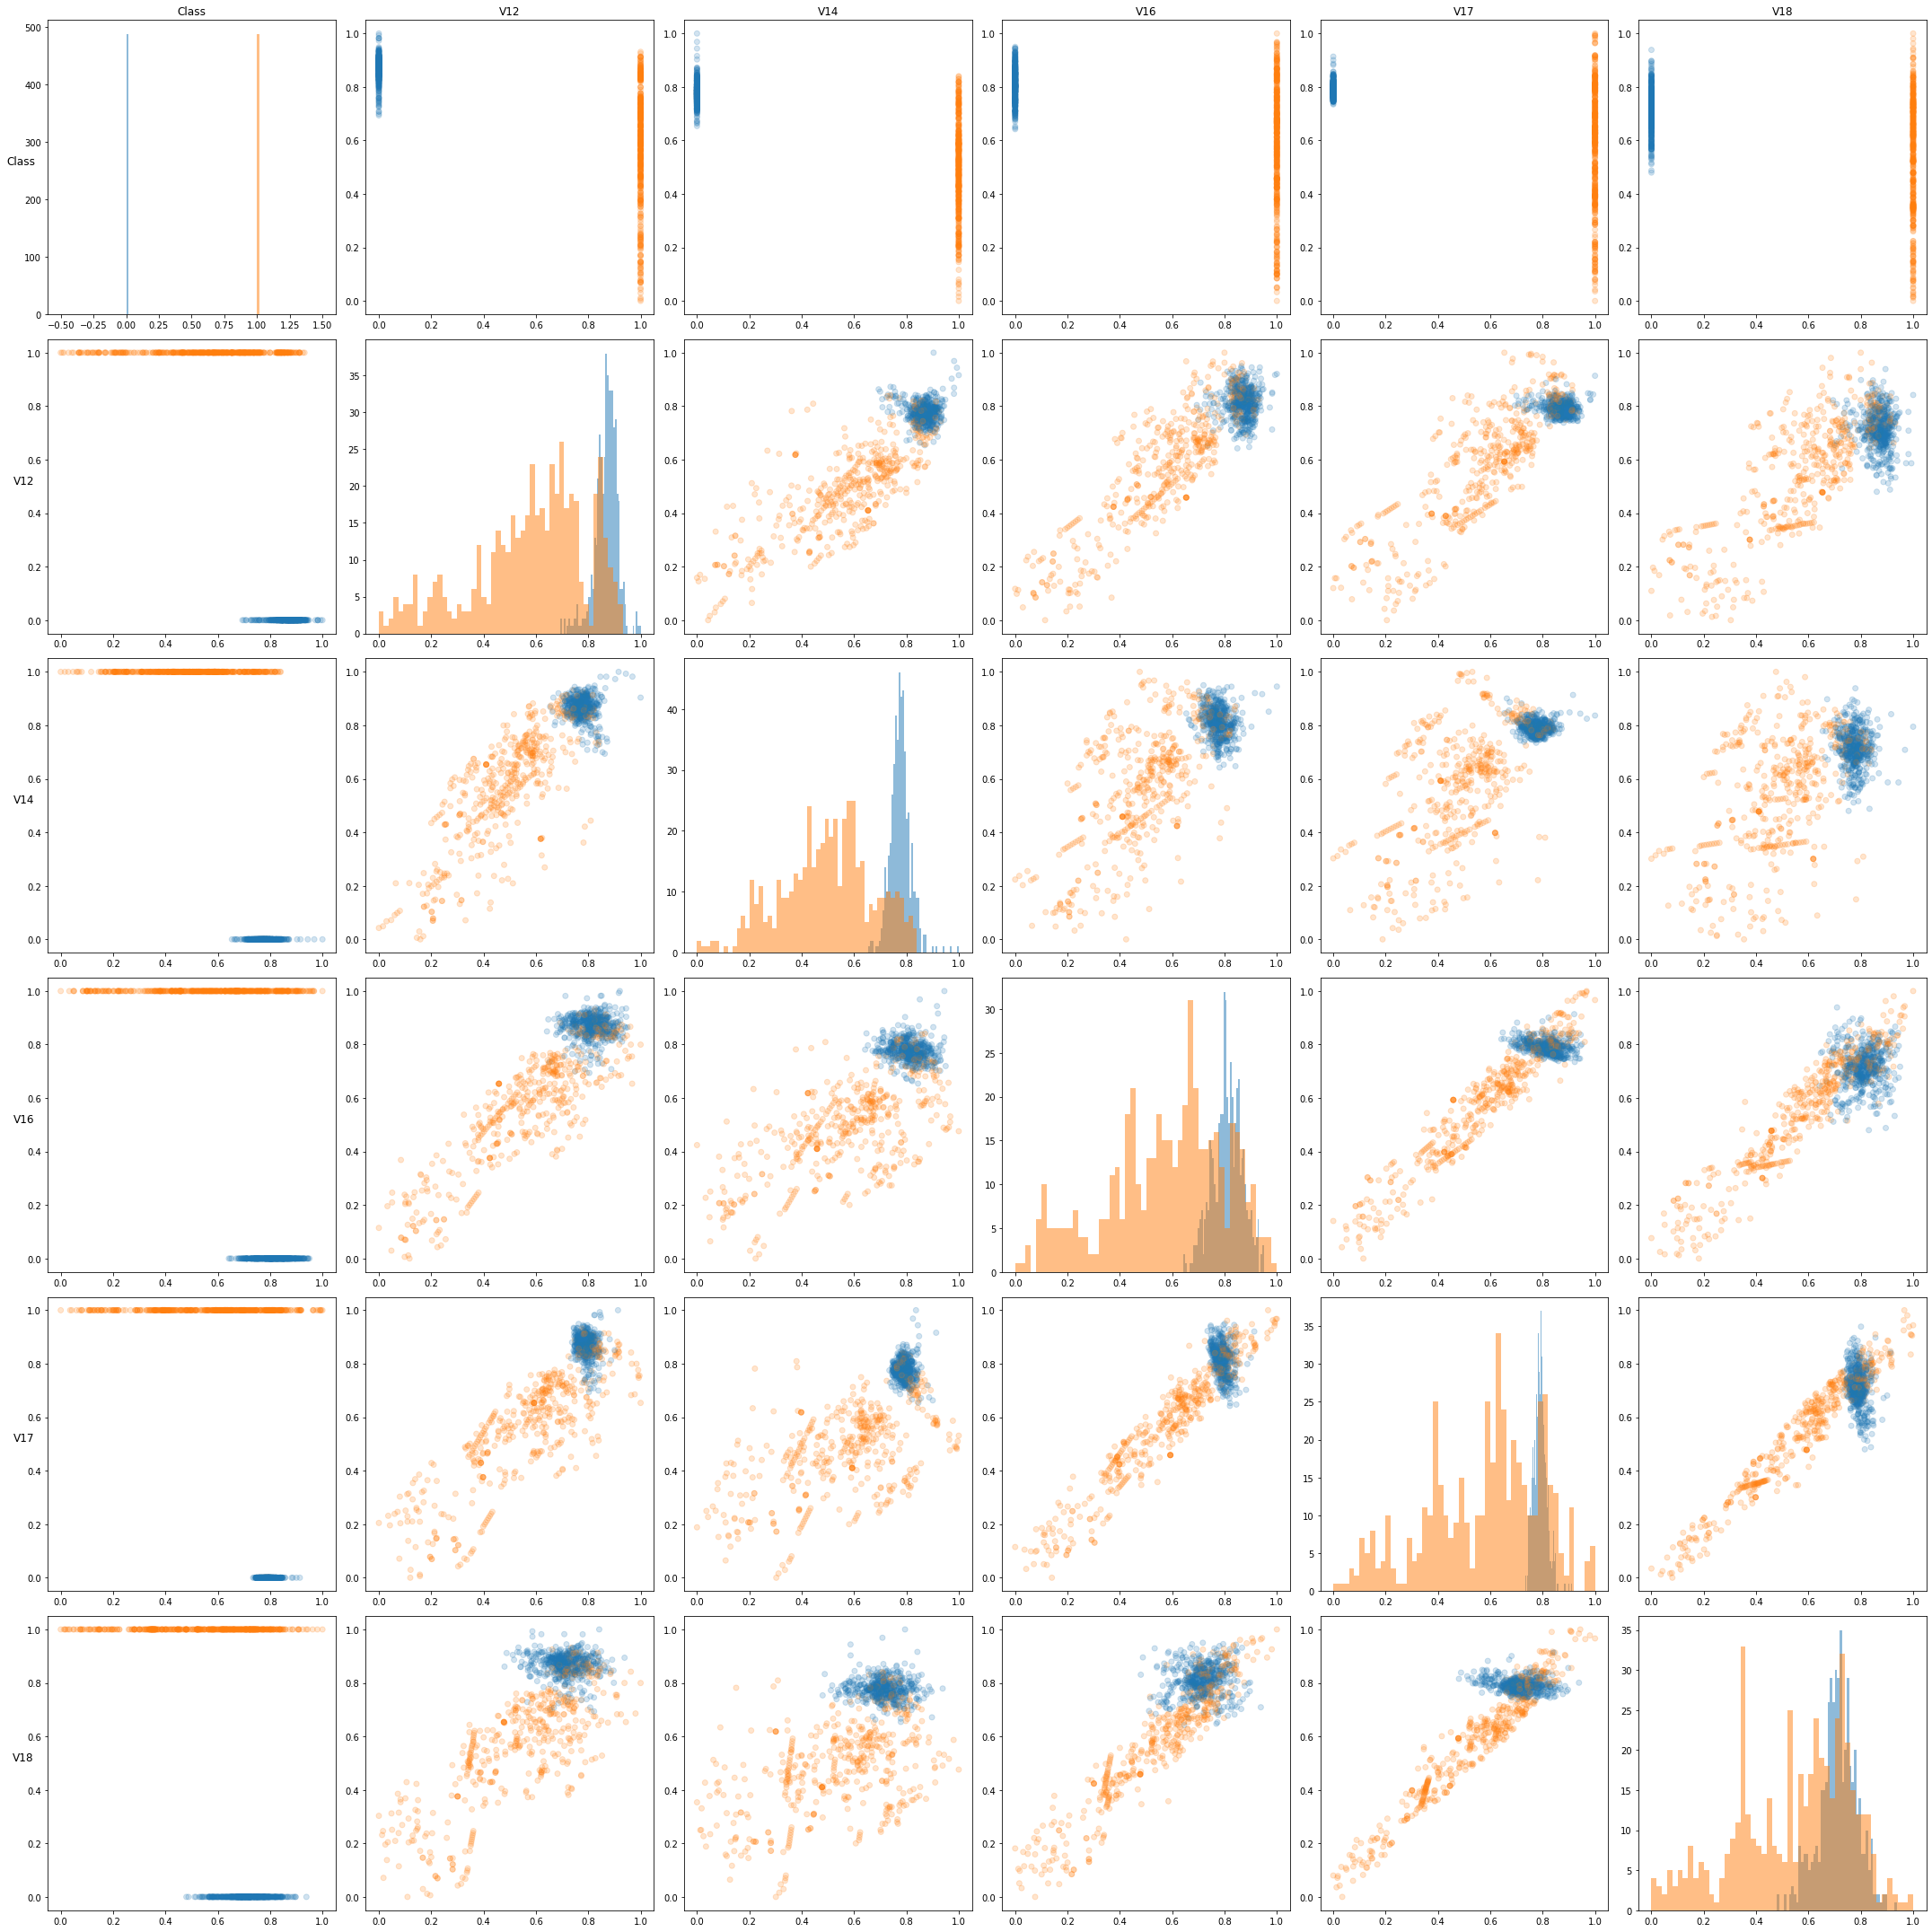

In [ ]:
# Pairplot for highly-correlated features
mat_pairplot(var_selected[sorted(pos_corr_set)], 'Class')

We can further confirm the similarity of two features by plotting them alongside an arbitrarily chosen feature. For example, highly synonymous features `V10` and `V12` produce similar scatter plots when paired with our arbitrarily chosen feature, `V24`, indicating that those two features contain similar information.

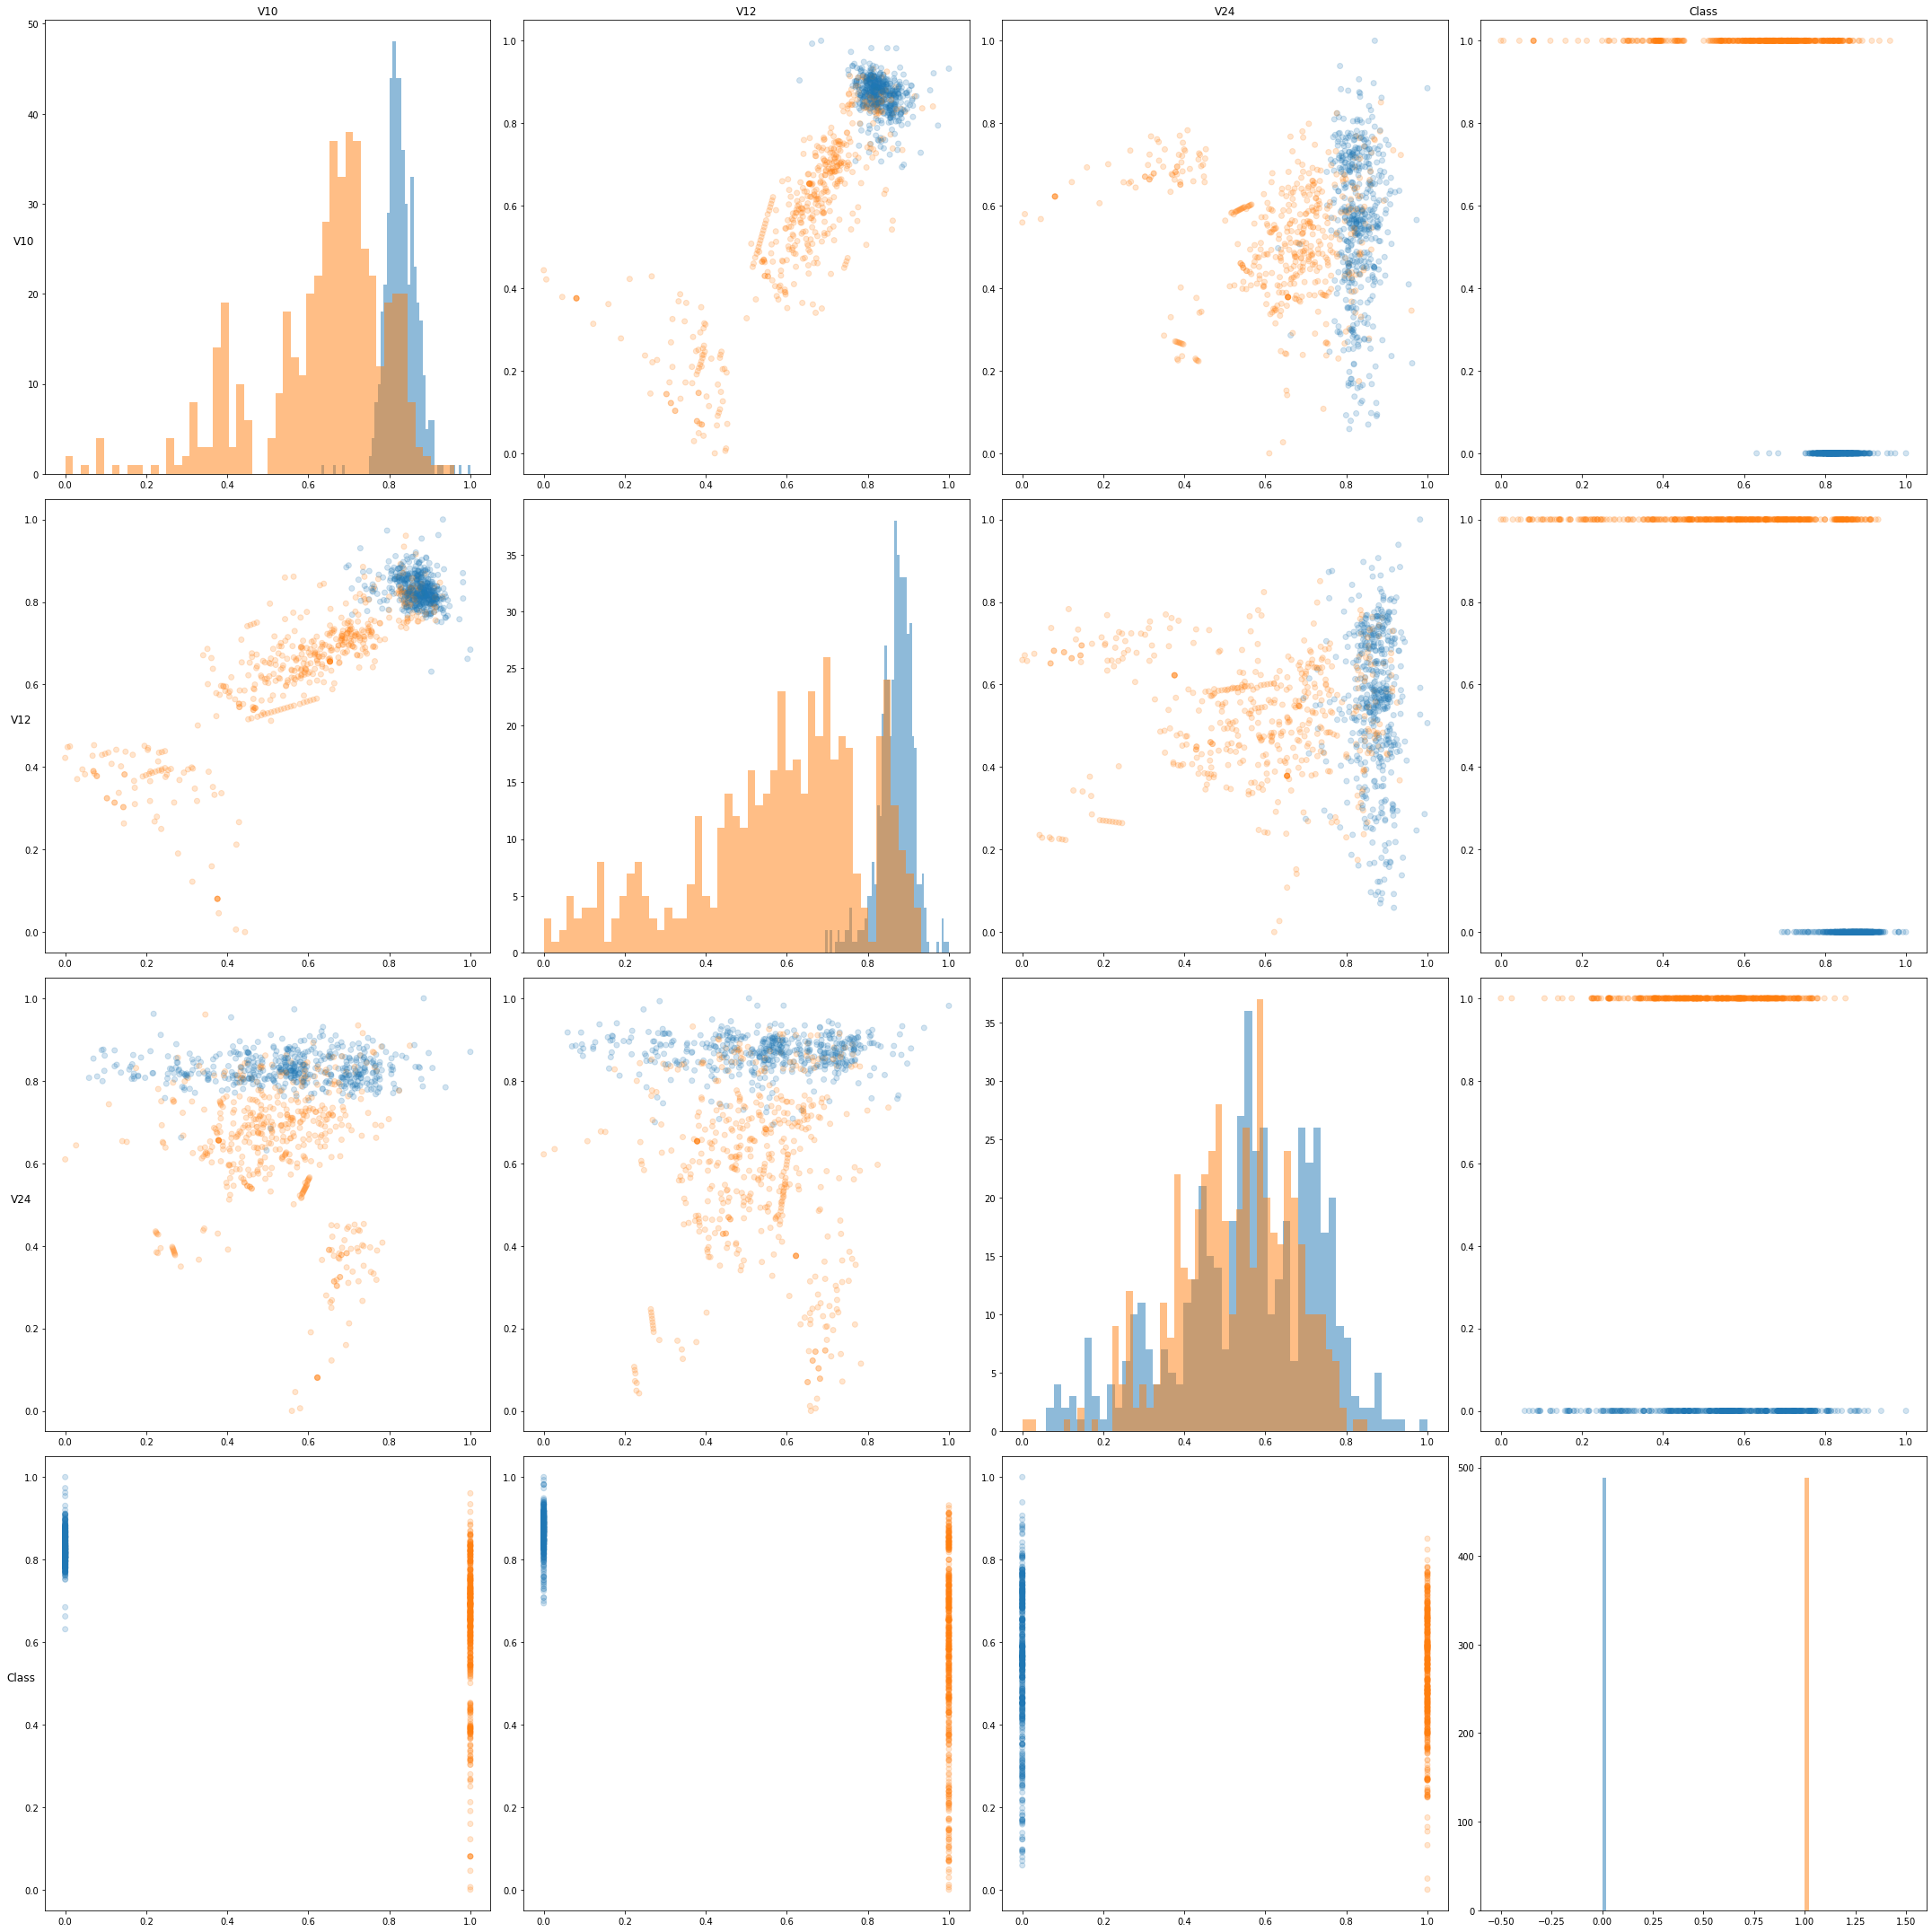

In [ ]:
# comparison pairplots, highly-correlated features to arbitrary feature
# mat_pairplot(var_selected[['V16', 'V17', 'V24', 'Normal']], 'Normal')
mat_pairplot(var_selected[['V10', 'V12', 'V24', 'Class']], 'Class')

Finally, we can further understand the similarity between our correlated features by looking at the mean and standard deviations of each. Below, we find that `V12` can be considered similar to several features and as we move through the data below, there is additional overlap between other similar features. We will remove one of each of the most highly-similar features: `V12`, `V16`, and `V18`.

In [ ]:
for x in pos_corr_list:
  print(var_selected[x].corr())
  print(var_selected[x].describe().T)
  print("")

          V12       V14
V12  1.000000  0.882808
V14  0.882808  1.000000
     count      mean       std  min       25%       50%       75%  max
V12  976.0  0.723013  0.213017  0.0  0.612467  0.829684  0.877306  1.0
V14  976.0  0.636268  0.189133  0.0  0.505264  0.732264  0.779321  1.0

         V12      V16
V12  1.00000  0.89459
V16  0.89459  1.00000
     count      mean       std  min       25%       50%       75%  max
V12  976.0  0.723013  0.213017  0.0  0.612467  0.829684  0.877306  1.0
V16  976.0  0.694765  0.199996  0.0  0.613013  0.765129  0.831152  1.0

          V12       V17
V12  1.000000  0.877344
V17  0.877344  1.000000
     count      mean       std  min       25%       50%       75%  max
V12  976.0  0.723013  0.213017  0.0  0.612467  0.829684  0.877306  1.0
V17  976.0  0.685568  0.187307  0.0  0.622549  0.771539  0.799609  1.0

          V16       V17
V16  1.000000  0.942149
V17  0.942149  1.000000
     count      mean       std  min       25%       50%       75%  max
V16  

In [ ]:
# use our variance filter and the results of our correlation analysis to filter features from our unscaled original dataframe
# save it to a new DF that we will balance below
var_selected = var_selected[var_selected.columns].drop(['Time', 'V12', 'V16', 'V18'], axis = 1)

var_selected

,V1,V3,V4,V5,V6,V7,V9,V10,V11,V13,V14,V15,V17,V19,V24,V25,V26,Class
303,0.531125,0.632702,0.428807,0.480243,0.946484,0.479178,0.711269,0.655765,0.469318,0.225083,0.410181,0.577027,0.592895,0.436263,0.378658,0.756674,0.361803,1.0
57,0.125277,0.027651,0.791477,0.116920,0.510648,0.238754,0.216584,0.080601,0.470238,0.413579,0.618332,0.283417,0.398107,0.368800,0.622520,0.631409,0.170020,1.0
79,0.898987,0.853328,0.568018,0.605220,0.672361,0.856051,0.607523,0.811140,0.327731,0.436588,0.568736,0.614431,0.737137,0.628733,0.531590,0.655609,0.389452,1.0
440,0.774476,0.755742,0.322195,0.603375,0.557463,0.758784,0.570564,0.639766,0.286154,0.334597,0.659790,0.645623,0.560207,0.397040,0.486020,0.835469,0.579735,1.0
240,0.732273,0.739864,0.332926,0.544749,0.469558,0.767643,0.651794,0.661934,0.396320,0.531612,0.424264,0.712404,0.564174,0.456262,0.767547,0.731740,0.420741,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9843,0.922932,0.979580,0.259798,0.636071,0.658386,0.851085,0.710546,0.818143,0.217303,0.422443,0.790919,0.916918,0.820341,0.305171,0.366407,0.601569,0.261815,0.0
9900,0.935892,0.955987,0.195076,0.633603,0.654877,0.842833,0.742268,0.805680,0.184313,0.617123,0.710683,0.678160,0.784896,0.553065,0.438998,0.601843,0.481412,0.0
477,0.244477,0.192818,0.617955,0.144312,0.306729,0.516667,0.521502,0.537314,0.528589,0.607845,0.470653,0.603407,0.386091,0.546344,0.590924,0.918826,0.336480,1.0
446,0.921504,0.809113,0.529542,0.563637,0.550629,0.751474,0.583003,0.636080,0.464922,0.477785,0.392691,0.419015,0.475094,0.537648,0.333720,0.844202,0.430770,1.0


###  3.9. Train, Test, Split
Finally, we will filter our unscaled, balanced dataset using our variance and high correlation filter constructed above. We can then split this dataset into training and testing subsets for modeling. The testing set in this split will be our final test set to be used for last-step model evaluation. This test set will not be used during tuning or cross validation.

In [ ]:
model_df = balanced_df[var_selected.columns]

model_df

,V1,V3,V4,V5,V6,V7,V9,V10,V11,V13,V14,V15,V17,V19,V24,V25,V26,Class
303,-13.192671,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-0.391540,-5.052502,4.406806,-1.909488,-9.072711,-0.226074,-6.248145,0.051576,-0.639435,0.263203,-0.108877,1
57,-26.457745,-30.177317,8.904157,-17.892600,-1.227904,-31.197329,-9.462573,-22.187089,4.419997,-0.703796,-3.926207,-2.400246,-12.462315,-0.567940,0.254836,-0.738097,-0.966564,1
79,-1.169203,-2.515135,5.463681,-0.297971,1.364918,0.759219,-2.293921,-0.423784,2.375876,-0.556619,-5.152475,0.050906,-1.646505,1.819013,-0.078616,-0.544655,0.014777,1
440,-5.238808,-5.784507,1.678889,-0.364432,-0.477295,-4.276132,-2.971644,-5.529131,1.779505,-1.208992,-2.901190,0.281878,-7.290960,-0.308609,-0.245727,0.893041,0.865758,1
240,-6.618211,-6.316453,1.844111,-2.476892,-1.886718,-3.817495,-1.482121,-4.868747,3.359722,0.051190,-8.724496,0.776391,-7.164430,0.235227,0.786670,0.063895,0.154707,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9843,-0.386579,1.714593,0.718200,0.813676,1.140852,0.502138,-0.404791,-0.215138,0.791902,-0.647098,0.340963,2.290813,1.007879,-1.152241,-0.684361,-0.976613,-0.556044,0
9900,0.037020,0.924202,-0.278290,0.724767,1.084584,0.074955,0.176896,-0.586430,0.318688,0.598151,-1.642868,0.522816,-0.122917,1.124157,-0.418163,-0.974427,0.426037,0
477,-22.561699,-24.643819,6.232532,-16.905611,-4.497439,-16.810184,-3.871297,-8.581266,5.256988,0.538801,-7.577552,-0.030726,-12.845657,1.062442,0.138972,1.559350,-0.222125,1
446,-0.433222,-3.996454,4.871299,-1.796308,-0.586868,-4.654543,-2.743539,-5.638941,4.343743,-0.293109,-9.505141,-1.396149,-10.006253,0.982584,-0.804230,0.962852,0.199558,1


In [ ]:
# assign features df
X = model_df.drop('Class', axis=1)

# assign labels df
y = model_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## <b>4. Technique 1: Logistic Regression</b>

### 4.1 Motivation & Schematic
Our first technique will be Logistic Regression. There are a number of reasons we will begin with this algorithm: 
- Logistic Regression is often used when the dependent variable is binary. As we are solving a binary classification problem it seems like an appropriate algorithm with which to begin.
- It is a very computationally efficient model to train. Especially on such a small dataset, this allows us an opportunity to iterate in our hyperparameter tuning.
- Logistic Regression constructs linear boundaries which, as we saw in the pairplot relationships above, may be an effective strategy on this dataset. 
- Logistic Regression is relatively interperatable. That is, we can explore potential feature importance to the model by examining the model's coefficients. It provides not only the weight of the feature importance via the coefficients, but also the direction in terms of negative and positive coefficients.


#### 4.1.1 Schematic
Click "Enlarge Image" to more clearly read the provided Gantt Chart, outlining the relative amount of time spent on each stage of this project.

[Enlarge Image](https://drive.google.com/file/d/1bM349MO_0v2g9DLxhKx_iUEIxRQAQXDB/view?usp=sharing)

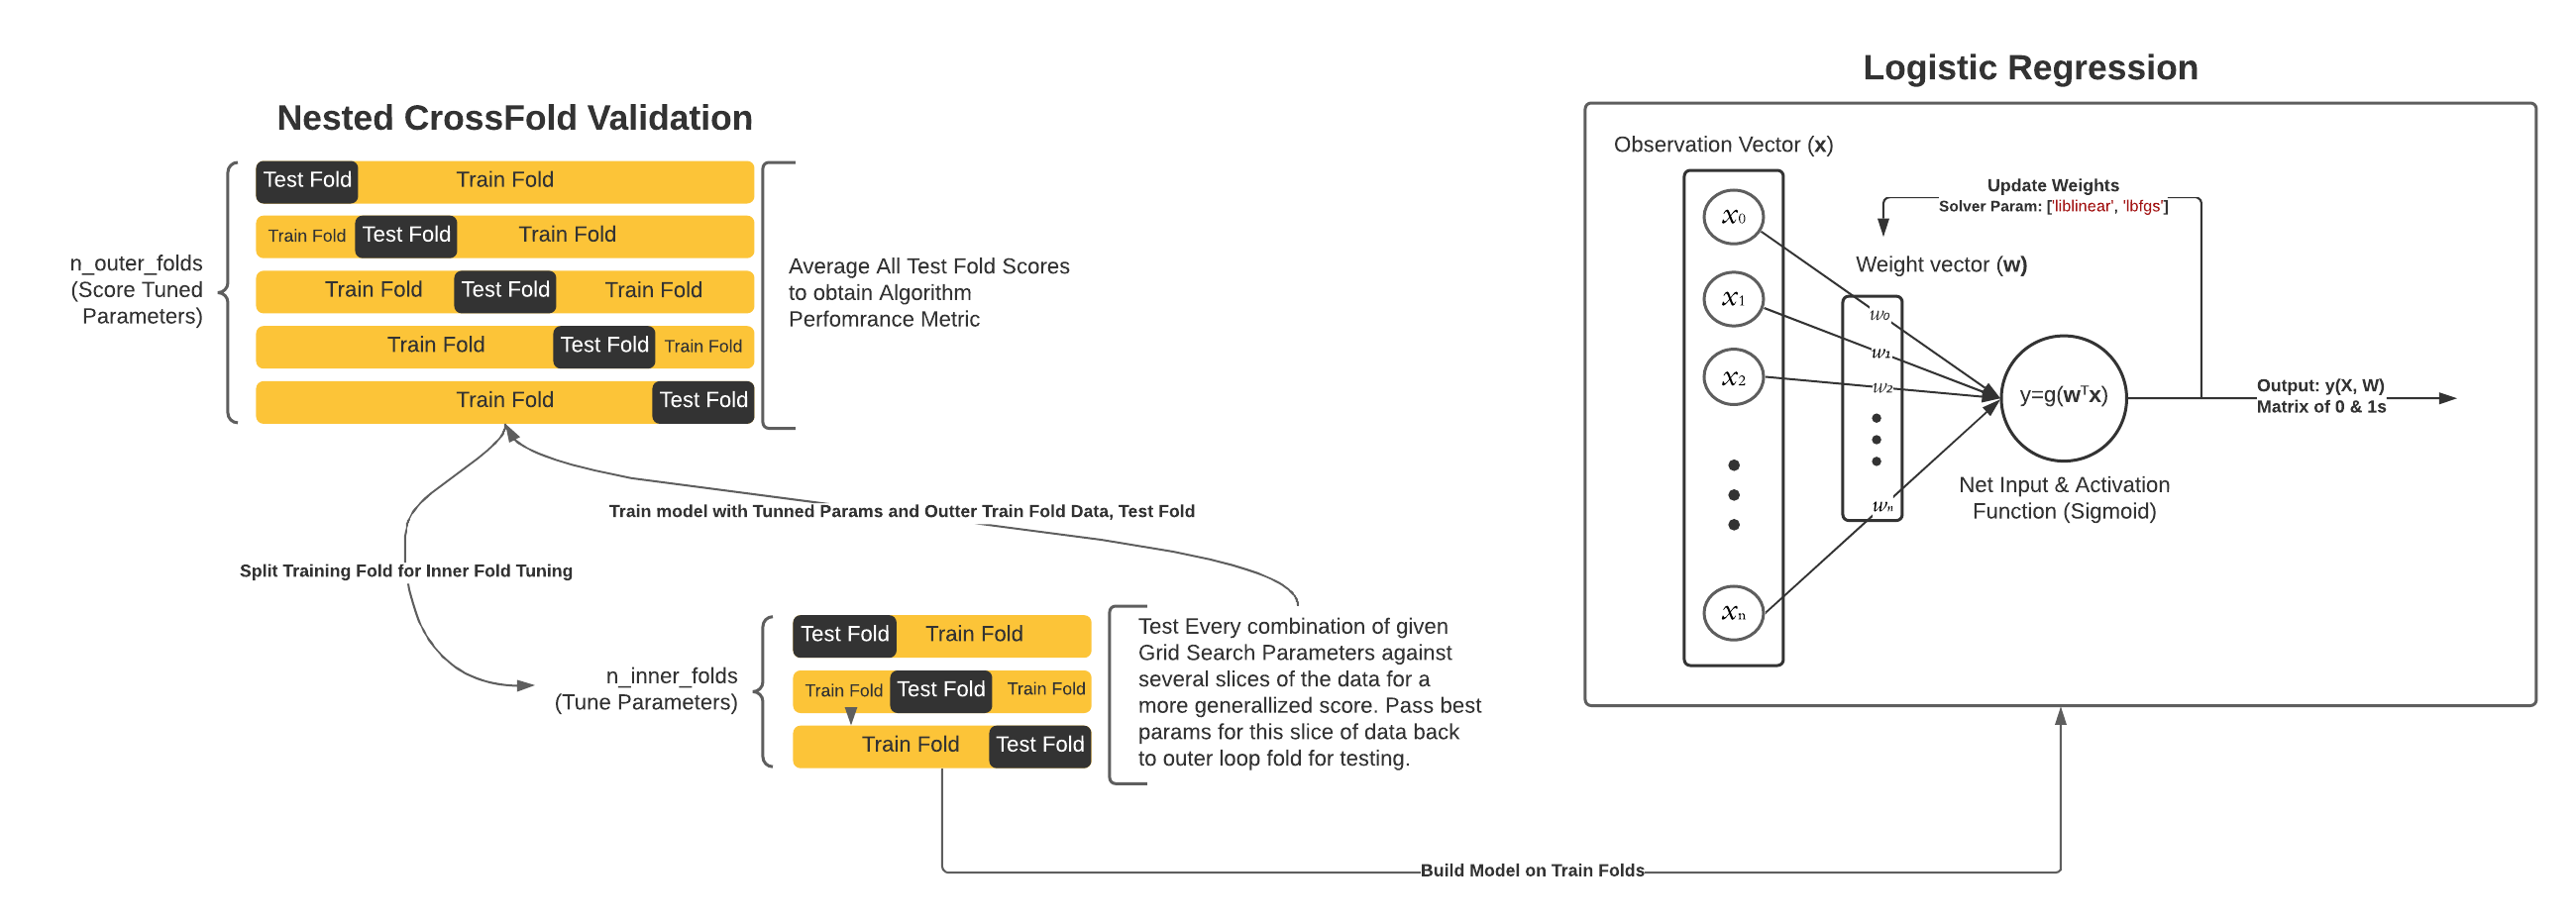

### 4.2 Setting Hyperparameters
As a quick-to-train model on a small dataset, we have an opportunity to experiment with a number of different hyperparameter combinations. Regardless, we discuss some of our considerations below: 

* **penality** - The use of a penalty for our dataset seems to contribute to overfitting in our model. Given the somewhat low dimensionality of our dataset, a penalty is likely not even required.

* **solver** - Although the documentation recommends liblinear for smaller datasets--and it does converge faster--the libliner requirement for a penalty function (L2) seems to cause overfitting--returning training metrics of or close to 1 in some cases with a relatively large dropoff in testing. Another common solver, saga, which allows us to remove the model penalty, produces a viable model though fails to converge. 'lbfgs' not only contributes to an accurate model, it converges quickly and does not require a penalty parameter.

* **multiclass** - I also passed `multi_class='ovr'`. The default is `auto` but, as a binary classification problem, I preferred to define the scope explicitly.

* **max_iter** - As mentioned above, some solvers converge more quickly than others. I set `max_iter` according to our convergence requirements for our final selections for `solver`.

*Below, I kept a version of our GridSearch function though it was helpful in testing combinations of hyperparameters in a couple of different iterations.*

### 4.3 Optimizing Hyperparameters
In order to build our model, we define our **outer** and **inner** **crossfolds**, build a **pipeline**, and pass everything through **GridSearchCV**:

**Outer Crossfold** - Our outer crossfold is used to evaluate a selection of best hyperparameters on a different training and testing set than those on which they were built. The average scores of these best hyperparameter tests will then give us an indication of how well an algorithm will generally perform on our dataset. This is used for algorithm selection.
<br />
<br />
**Inner Crossfold** - Our inner crossfolds will select the best hyperparameters for a given fold of training and testing data. This is used both to find hyperparameters with which to train and test our outer crossfolds and, finally, to refit our model with the best hyperparameters trained on the whole, unfolded test set.
<br />
<br />
We will use 3 folds for our Inner CV and 5 folds for our Outer CV. This may seem low, but performance may suffer if the dataset is split too finely.
<br />
<br />
**Pipeline** - Creating a pipeline that contains our scaler and our model will allow us to prevent data leakage when we pass it to our GridSearchCV.
<br />
<br />
**GridSearchCV** GridSearchCV's duty is two-fold. It will search every combination of given hyperparameters and use each combination within a cross fold validation process. Passing our pipeline to GridSearchCV will ensure that every training set within our cross fold validation will be scaled separately from each test set, which will prevent information from leaking into our test sets.

**Refit:** GridSearchCV's refit allows us to refit our model using the best hyperparameters found according to a particular scoring method of our choosing. We settled on the refit indicated below following a couple of tests, selecting one that results in a model that best represents our customer's needs.

In [ ]:
# configure the inner cross-validation procedure
cv_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
# configure the outer cross-validation procedure
cv_outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# instantiate pipeline with scaler and model, so that each training set
# in each fold is fit to the scalar and each training/test set in each fold 
# is respectively transformed by fit scalar, preventing data leaks between each test/train
LR_pipe = Pipeline([('scaler', preprocessing.MinMaxScaler()),  
                    ('model', LogisticRegression(multi_class='ovr', random_state = 1))
                   ])

# prams should include where to pass specific prams within the pipeline
# ex, model params need to be prefixed with "model__", scaler with "scaler__"
LR_params = {'model__penalty': ['none'],
             'model__solver' : ['liblinear', 'lbfgs'],
             'model__max_iter': [1000, 2000, 3000],
             }

# define scoring so that we can see multiple metrics
LR_scoring = {'recall': 'recall', 
              'accuracy': 'accuracy', 
              'f1':'f1', 
              'precision':'precision', 
              'roc_auc':'roc_auc'
              }

# define search grid
LR_grid = GridSearchCV(estimator=LR_pipe, 
                       param_grid=LR_params, 
                       n_jobs=-1, 
                       cv=cv_inner,
                       scoring=LR_scoring,
                       refit='recall',
                       verbose=2)

In [ ]:
# execute the nested cross-validation
LR_scores = cross_validate(LR_grid, 
                           X_train, 
                           y_train, 
                           scoring=LR_scoring, 
                           cv=cv_outer, 
                           n_jobs=-1, 
                           verbose=2)

# print(LR_scores.keys())

### 4.4 Training Performance Metrics
Below, we output the overall performance of the LR algorithm on this dataset, as discovered by our Nested Cross Fold Grid Search process.. These metrics will be used to compare this algorithm to our other tested algorithms.


In [ ]:
# report Logistic Regression performance
print('Logistic Regression Nested CV Algorithm Selection Performance:')
print('F1: %.3f (%.3f)' % (np.mean(LR_scores['test_f1']), np.std(LR_scores['test_f1'])))
print('Recall: %.3f (%.3f)' % (np.mean(LR_scores['test_recall']), np.std(LR_scores['test_recall'])))
print('Precision: %.3f (%.3f)' % (np.mean(LR_scores['test_precision']), np.std(LR_scores['test_precision'])))

For further analysis to be discussed in section 6, we will refit our model with the best parameters as defined by GridSearchCV above.

In [ ]:
# fit the grid
LR_grid_result = LR_grid.fit(X_train, y_train)

In [ ]:
# view best parameters from fit grid
print("Best: %f using %s" % (LR_grid_result.best_score_, LR_grid_result.best_params_))

In [ ]:
# refit our model using the best parameters above
LR_tuned = LR_grid_result.best_estimator_

# get predictions for use in later metrics
LR_pred = LR_tuned.predict(X_test)

On a final note, we can view each feature's respective coefficients for our fit model. These may be used as an indication of feature importance to our model. The larger the value, either in the negative or positive direction, the more important each feature may be.

In [ ]:
print(np.std(X_train, 0)*LR_tuned.named_steps['model'].coef_[0])

## <b>5. Technique 2: MLP Classifier</b>

### 5.1 Motivation & Schematic
Several of our scatter plots above indicated that not all of our feature relationships may be completely linearly separable, with instances of Fraud lying on more than one side of our Normal transactions, in some cases. 
<br />
<br />
In attempting to extrapolate from our 2D visualisation into higher-dimensional space, it's plausible that our Fraud observations form nonlinear boundaries in relation to our Normal observations.
<br />
<br />
Logistic Regression seemed to work well on our dataset, however, it will be interesting to see if there are some non-linearly separable elements in our dataset that we can capture by expanding upon Logistic Regression with a Multi Layer Perceptron model.
<br />
<br />
Additionally, whereas we saw some difficulty using the penalty parameter in our Logistic Regression models, Multi Layer Perceptron allows fine control over the L2 penalty via the alpha parameter. This may help us more effectively generalize our MLP models over Log Regression.


#### 5.1.1 Schematic
Click "Enlarge Image" to more clearly read the provided Gantt Chart, outlining the relative amount of time spent on each stage of this project.

[Enlarge Image](https://drive.google.com/file/d/13XQcNBSJKVxlSwrFxBRe-Y1Pps-dXlCu/view?usp=sharing)

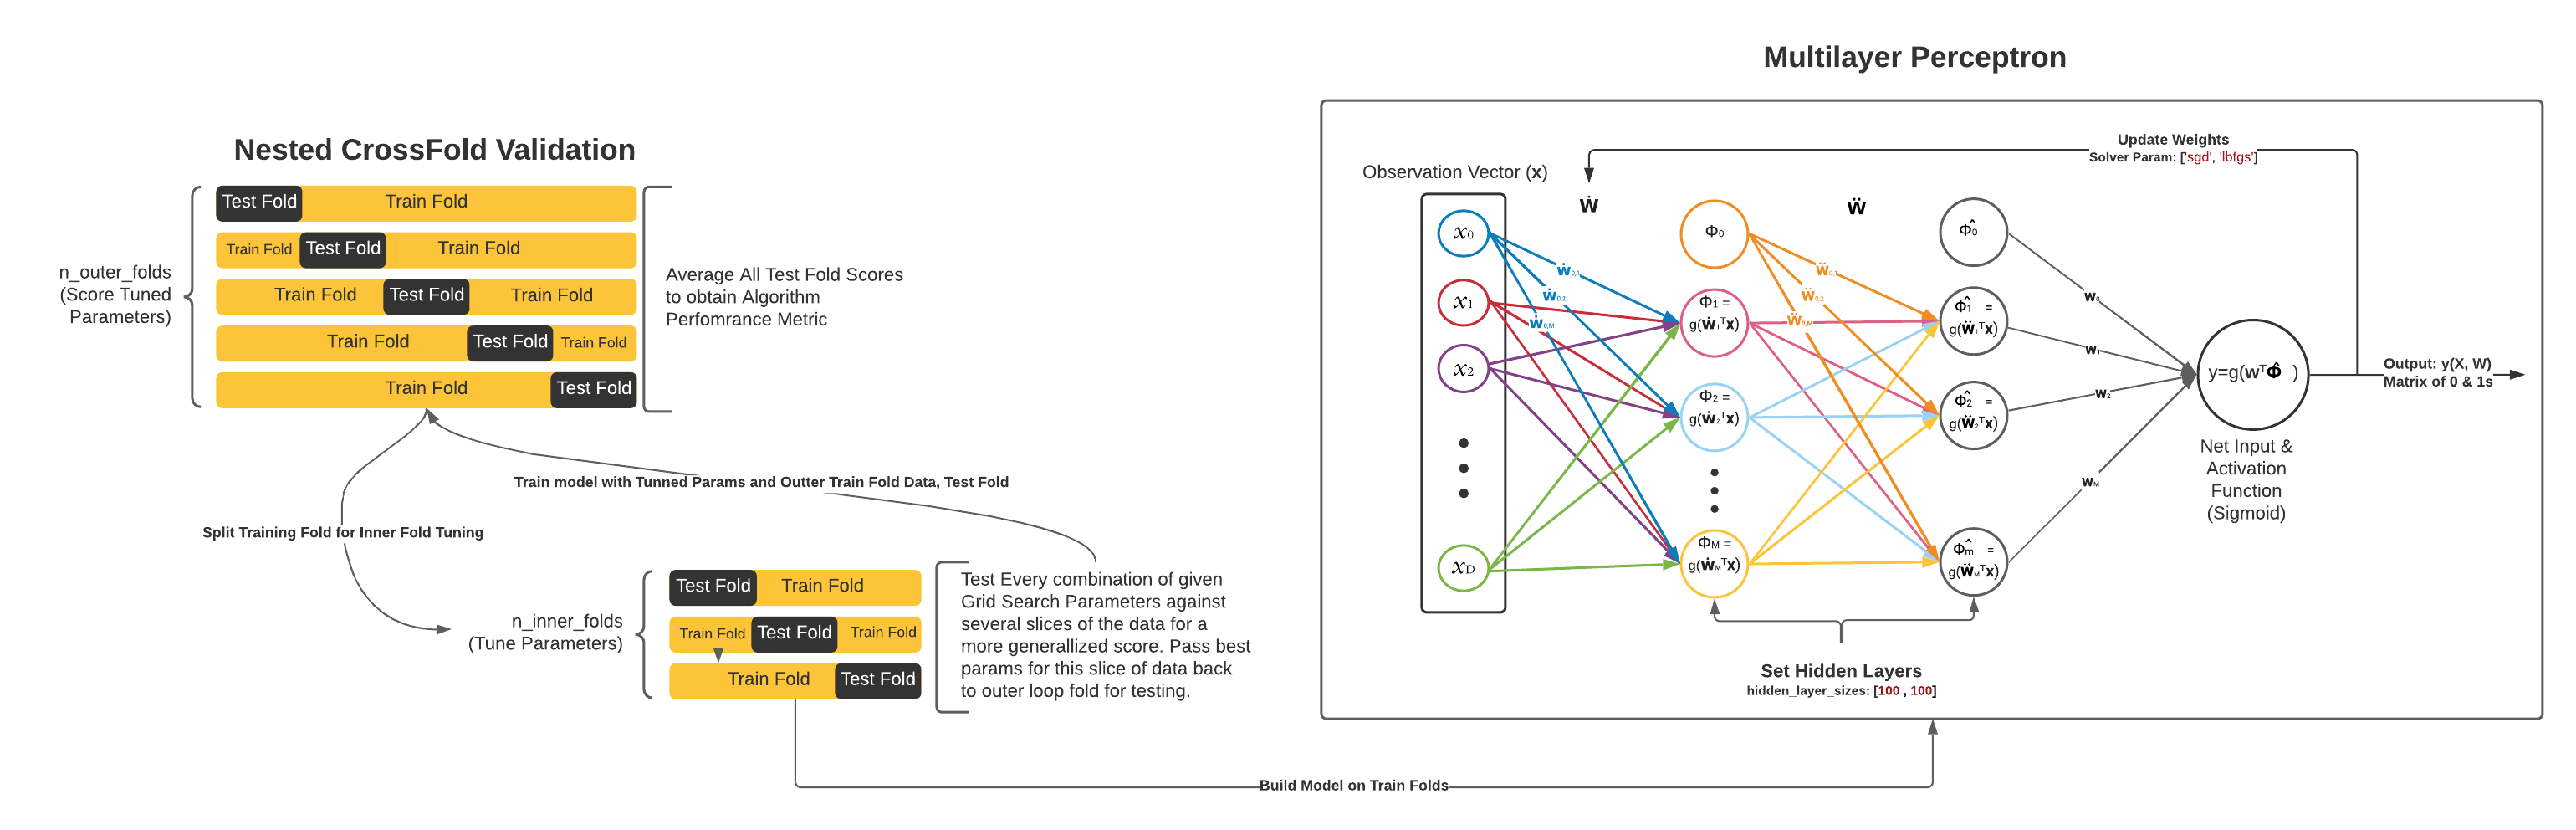

### 5.2 Setting Hyperparameters
* **activation** - as a binary classification problem with features and label values set between 0 and 1, it also makes sense to use an activation function that outputs predictions as a probability between 0 and 1.

* **alpha** - The default alpha for Sklearn's MLPClassifier is .0001. In a previous lesson we explored how higher alpha values may help to generalize a model to a point. I've passed a small range of alphas to our Grid Search so that the potential generalization of a higher value may be captured during our crossfold validations.

* **hidden_layer_sizes** - Cursory prototyping did not indicate much, if any, difference in a larger number of layers and neurons than what I have passed below, options for [[50, 50], [100, 100]].

* **solver** - Below we pass both `lbfgs` and `sgd`. We try `lbfgs` as the Sklearn documentation recommends it for its speed and performance on small datasets, and we pass `sgd` as a familiar process that we've studied in the unit.

### 5.3 Optimizing Hyperparameters
In order to build our model, we define our **outer** and **inner** **crossfolds**, build a **pipeline**, and pass everything through **GridSearchCV**:

**Outer Crossfold** - Our outer crossfold is used to evaluate a selection of best hyperparameters on a different training and testing set than those on which they were built. The average scores of these best hyperparameter tests will then give us an indication of how well an algorithm will generally perform on our dataset. This is used for algorithm selection.
<br />
<br />
**Inner Crossfold** - Our inner crossfolds will select the best hyperparameters for a given fold of training and testing data. This is used both to find hyperparameters with which to train and test our outer crossfolds and, finally, to refit our model with the best hyperparameters trained on the whole, unfolded test set.
<br />
<br />
We will use 3 folds for our Inner CV and 5 folds for our Outer CV. This may seem low, but performance may suffer if the dataset is split too finely.
<br />
<br />
**Pipeline** - Creating a pipeline that contains our scaler and our model will allow us to prevent data leakage when we pass it to our GridSearchCV.
<br />
<br />
**GridSearchCV** GridSearchCV's duty is two-fold. It will search every combination of given hyperparameters and use each combination within a cross fold validation process. Passing our pipeline to GridSearchCV will ensure that every training set within our cross fold validation will be scaled separately from each test set, which will prevent information from leaking into our test sets.

**Refit:** GridSearchCV's refit allows us to refit our model using the best hyperparameters found according to a particular scoring method of our choosing. We settled on the refit indicated below following a couple of tests, selecting one that results in a model that best represents our customer's needs.


In [ ]:
# configure the inner cross-validation procedure
cv_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
# configure the outer cross-validation procedure
cv_outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# instantiate pipeline with scaler and model, so that each training set
# in each fold is fit to the scalar and each training/test set in each fold 
# is respectively transformed by fit scalar, preventing data leaks between each test/train
MLP_pipe = Pipeline([('scaler', preprocessing.MinMaxScaler()),  
                     ('model', MLPClassifier(solver = 'lbfgs', 
                                             random_state = 1, 
                                             max_iter = 2000, 
                                             early_stopping = True, 
                                             hidden_layer_sizes = [100, 100]))
                    ])

# prams should include where to pass specific prams within the pipeline
# ex, model params need to be prefixed with "model__", scaler with "scaler__"
MLP_params = {'model__solver': ['lbfgs', 'sgd'], 
              'model__alpha': [.0001, .001, .01],
              'model__activation': ['logistic'],
              'model__hidden_layer_sizes': [[50, 50], [100, 100]] 
              }

# define scoring so that we can see multiple metrics
MLP_scoring = {'recall': 'recall', 
               'accuracy': 'accuracy', 
               'f1':'f1', 
               'precision':'precision',  
               'roc_auc':'roc_auc'}

# define search
MLP_grid = GridSearchCV(estimator=MLP_pipe, 
                        param_grid=MLP_params, 
                        n_jobs=-1, 
                        cv=cv_inner,
                        scoring=MLP_scoring,
                        refit='f1',
                        verbose=2)

In [ ]:
# execute the nested cross-validation
MLP_scores = cross_validate(MLP_grid, 
                            X_train, 
                            y_train, 
                            scoring=MLP_scoring, 
                            cv=cv_outer, 
                            n_jobs=-1, 
                            verbose=2)

# print(RF_scores.keys())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished


### 5.4 Training Performance Metrics
Below, we output the overall performance of the MLP algorithm on this dataset, as discovered by our Nested Cross Fold Grid Search process. These metrics will be used to compare this algorithm to our other tested algorithms.


In [ ]:
# report Multilayer Perceptron performance
print('Multilayer Perceptron Nested CV Algorithm Selection Performance:')
print('F1: %.3f (%.3f)' % (np.mean(MLP_scores['test_f1']), np.std(MLP_scores['test_f1'])))
print('Recall: %.3f (%.3f)' % (np.mean(MLP_scores['test_recall']), np.std(MLP_scores['test_recall'])))
print('Precision: %.3f (%.3f)' % (np.mean(MLP_scores['test_precision']), np.std(MLP_scores['test_precision'])))

Multilayer Perceptron Nested CV Algorithm Selection Performance:
F1: 0.948 (0.035)
Recall: 0.925 (0.068)
Precision: 0.976 (0.021)


For further analysis to be discussed in section 6, we will refit our model with the best parameters as defined by GridSearchCV above.

In [ ]:
# fit the grid
MLP_grid_result = MLP_grid.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   17.0s finished


In [ ]:
# view best parameters from fit grid
print("Best: %f using %s" % (MLP_grid_result.best_score_, MLP_grid_result.best_params_))

Best: 0.988225 using {'model__activation': 'logistic', 'model__alpha': 0.01, 'model__hidden_layer_sizes': [50, 50], 'model__solver': 'lbfgs'}


In [ ]:
# refit our model using the best parameters above
MLP_tuned = MLP_grid_result.best_estimator_

# get predictions for use in later metrics
MLP_pred = MLP_tuned.predict(X_test)

## <b>6. Technique 3: Random Forest</b>

### 6.1 Motivation & Schematic

Our outlier exploration and visualisations above indicate that there is a relatively well-defined relationship between the features of our Fraud class and the features of our Normal class. Specifically, fraud appears to be an outlying behavior while normal transactions appear to have a more narrowly defined range of values within each feature. A decision tree may be able to define decision boundaries separating our fraud from our normal classes. By using Random Forest, we may be able to reduce variance and explore additional relationships between our variables via the random feature selection that takes place when building a decision tree within a random forest.

#### 6.1.1 Schematic
Click "Enlarge Image" to more clearly read the provided Gantt Chart, outlining the relative amount of time spent on each stage of this project.

[Enlarge Image](https://drive.google.com/file/d/1dtWirkFTCj4tuwIJ78fuEdAEtZr1D7bV/view?usp=sharing)

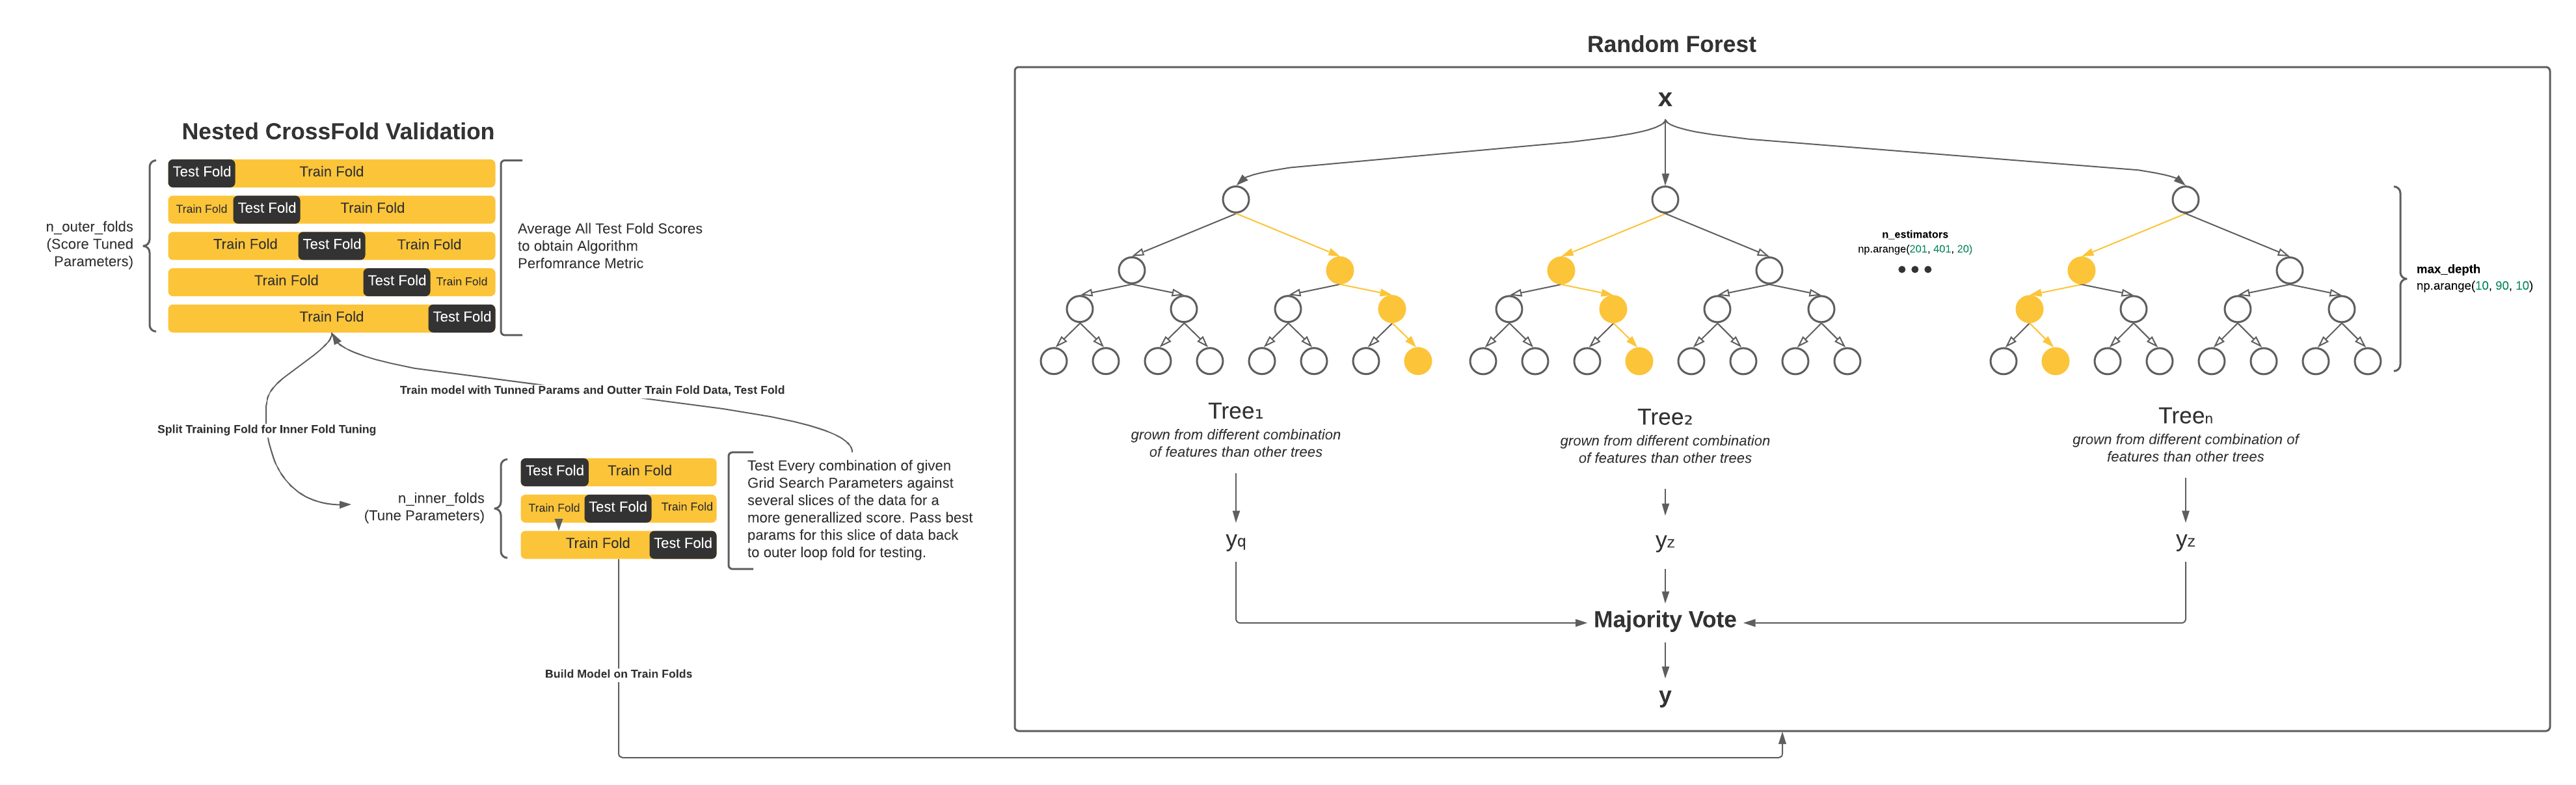

### 6.2 Setting Hyperparameters
**n_estimators** - Selected an odd numer of estimaters over a larger range as a broadstroak approach. Can be refined in subsequent tests.
<br />
<br />
**criterion** - In this project, we will only test the gini criterion as it is less computationally expensive than entropy.
<br />
<br />
**max_depth** - Max Depth is an important hyperparameter in helping to prevent overfitting. After some research, we've found that researchers often test depths up to 100. However, the best max depth for any given model is depenent on the dataset. For example, a dataset with a larger number of demensions may require deeper trees to be effective. One strategey to understand the range of depths to check for our particular dataset is to set `max_depth = None`, assess how deep the trees grow naturally, and select a range of test values smaller than that natural growth. However, for the sake of this project, we will simply test values up to 80, given the somewhat low demonsonality of our data.
<br />
<br />
**min_samples_split & min_samples_leaf** - Both of these values are also important for preventing over fitting. Given how seperable or data seems, as indicated by our pairplots above, we will set both of these to relatively low test values. If it appears we are overfitting, these can be adjusted.



### 6.3 Optimizing Hyperparameters
In order to build our model, we define our **outer** and **inner** **crossfolds**, build a **pipeline**, and pass everything through **GridSearchCV**:

**Outer Crossfold** - Our outer crossfold is used to evaluate a selection of best hyperparameters on a different training and testing set than those on which they were built. The average scores of these best hyperparameter tests will then give us an indication of how well an algorithm will generally perform on our dataset. This is used for algorithm selection.
<br />
<br />
**Inner Crossfold** - Our inner crossfolds will select the best hyperparameters for a given fold of training and testing data. This is used both to find hyperparameters with which to train and test our outer crossfolds and, finally, to refit our model with the best hyperparameters trained on the whole, unfolded test set.
<br />
<br />
We will use 3 folds for our Inner CV and 5 folds for our Outer CV. This may seem low, but performance may suffer if the dataset is split too finely.
<br />
<br />
**Pipeline** - Creating a pipeline that contains our scaler and our model will allow us to prevent data leakage when we pass it to our GridSearchCV.
<br />
<br />
**GridSearchCV** GridSearchCV's duty is two-fold. It will search every combination of given hyperparameters and use each combination within a cross fold validation process. Passing our pipeline to GridSearchCV will ensure that every training set within our cross fold validation will be scaled separately from each test set, which will prevent information from leaking into our test sets.

**Refit:** GridSearchCV's refit allows us to refit our model using the best hyperparameters found according to a particular scoring method of our choosing. We settled on the refit indicated below following a couple of tests, selecting one that results in a model that best represents our customer's needs.

In [ ]:
# configure the inner cross-validation procedure
cv_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
# configure the outer cross-validation procedure
cv_outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# instantiate pipeline with scaler and model, so that each training set
# in each fold is fit to the scalar and each training/test set in each fold 
# is respectively transformed by fit scalar, preventing data leaks between each test/train
RF_pipe = Pipeline([('scaler', preprocessing.MinMaxScaler()),  
                    ('model', RandomForestClassifier(max_depth=2, 
                                                     random_state=0))
                    ])

# prams should include where to pass specific prams within the pipeline
# ex, model params need to be prefixed with "model__", scaler with "scaler__"
RF_params = {'model__n_estimators': np.arange(201, 401, 20),
             'model__criterion': ['gini'],
             'model__max_features': ['auto'],
             'model__max_depth': np.arange(10, 90, 10),
             'model__min_samples_split': [2, 5, 10],
             'model__min_samples_leaf': [3, 4, 5]
             }

# define scoring so that we can see multiple metrics
RF_scoring = {'recall': 'recall', 
              'accuracy': 'accuracy', 
              'f1':'f1', 
              'precision':'precision', 
              'roc_auc':'roc_auc'}

# define search
RF_grid = GridSearchCV(estimator=RF_pipe, 
                       param_grid=RF_params, 
                       n_jobs=-1, 
                       cv=cv_inner,
                       scoring=RF_scoring,
                       refit='recall', # set refit to use top recall
                       verbose=2)

In [ ]:
# execute the nested cross-validation
RF_scores = cross_validate(RF_grid, 
                           X_train, 
                           y_train, 
                           scoring=RF_scoring, 
                           cv=cv_outer, 
                           n_jobs=-1, 
                           verbose=2)

# print(RF_scores.keys())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 89.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 89.1min finished


### 6.4 Training Performance Metrics
Below, we output the overall peformance of the RF algorithm on this dataset, as discovred by our Nested Cross Fold Grid Search process.. These metrics will be used to compaire this algorithm to our other target algorithims.

In [ ]:
# report Random Forest performance
print('Random Forest Nested CV Algorithm Selection Performance:')
print('F1: %.3f (%.3f)' % (np.mean(RF_scores['test_f1']), np.std(RF_scores['test_f1'])))
print('Recall: %.3f (%.3f)' % (np.mean(RF_scores['test_recall']), np.std(RF_scores['test_recall'])))
print('Precision: %.3f (%.3f)' % (np.mean(RF_scores['test_precision']), np.std(RF_scores['test_precision'])))

Random Forest Nested CV Algorithm Selection Performance:
F1: 0.996 (0.003)
Recall: 0.992 (0.006)
Precision: 1.000 (0.000)


For further analysis to be discussed in section 6, we will refit our model with the best parameters as defined by GridSearchCV above.

In [ ]:
# fit the grid
RF_grid_result = RF_grid.fit(X_train, y_train)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed: 17.3min finished


In [ ]:
# view best params from reffitit grid
print("Best: %f using %s" % (RF_grid_result.best_score_, RF_grid_result.best_params_))
RF_params = RF_grid_result.cv_results_['params']

Best: 0.992188 using {'model__criterion': 'gini', 'model__max_depth': 10, 'model__max_features': 'auto', 'model__min_samples_leaf': 3, 'model__min_samples_split': 2, 'model__n_estimators': 201}


In [ ]:
# refit our model using the best parameters above
RF_tuned = RF_grid_result.best_estimator_

# get predictions for use in later metrics
RF_pred = RF_tuned.predict(X_test)

## <b>7. Comparison of Metrics Performance for Testing</b> 



In [ ]:
# define a dictionary to hold all of our model details
mod_dict = {'Logistic Regression': [LR_scores, LR_pred, LR_tuned],
            'Multilayer Perceptron': [MLP_scores, MLP_pred, MLP_tuned],
            'Random Forest': [RF_scores, RF_pred, RF_tuned]}

In order to build all three of our models, we utilized nested cross fold validation. Models can become overfit if they are trained too specifically on our given training data. Cross Fold Validation helps to reduce the risk of overfitting by training models on multiple different slices of the given training data, making it difficult for a model to overfit on the training set as a whole.
<br />
<br />
Below, we take a look at the results of our outer crossfold validations. The outer crossfold validation returns a score for how well a given algorithm will generally perform on our given dataset. This is used for comparing the potential performance of multiple candidate algorithms.
<br />
<br />
We find that all of our candidate algorithms perform similarly well, with RandomForest performing best on all metrics by a slight margin. If we were to select an algorithm and, subsequently, a model based on these metrics alone, we would likely choose Random Forest. However, we must also consider the time it takes to train each model. Noting that they all perform well, perhaps it would be best to choose a more efficient model, for scalability or the prospect of future retraining. With that in mind, perhaps Logistic Regression would be a good choice for our use-case. A close second by our outer fold cross validation metrics, Logistic Regression also took significantly less time and computational power to train.
<br />
<br />
As we move on to sections 7.2 and 7.3, we can see how our selected models perform on our final test set.

In [ ]:
for k, v in mod_dict.items():
  # Report Nested CV performance
  print(f'{k} Nested CV Algorithm Selection Performance:')
  print('F1: %.3f (%.3f)' % (np.mean(v[0]['test_f1']), np.std(v[0]['test_f1'])))
  print('Recall: %.3f (%.3f)' % (np.mean(v[0]['test_recall']), np.std(v[0]['test_recall'])))
  print('Precision: %.3f (%.3f)' % (np.mean(v[0]['test_precision']), np.std(v[0]['test_precision'])))
  print('')

Logistic Regression Nested CV Algorithm Selection Performance:
F1: 0.979 (0.009)
Recall: 0.982 (0.010)
Precision: 0.977 (0.018)

Multilayer Perceptron Nested CV Algorithm Selection Performance:
F1: 0.948 (0.035)
Recall: 0.925 (0.068)
Precision: 0.976 (0.021)

Random Forest Nested CV Algorithm Selection Performance:
F1: 0.996 (0.003)
Recall: 0.992 (0.006)
Precision: 1.000 (0.000)



### 7.2 Comparison with appropriate metrics for testing
Our inner cross fold validation process helps us select a model for each of our candidate algorithms with the best combination of hyperparameters to meet our target goals.
<br />
<br />
We can further compare the performance of each of our algorithms by selecting the best model for each and performing a final test on our original holdout test dataset—created originally during our Tran, Test, Split process. This test set has remained untouched until this point, reserved for our final evaluations.
<br />
<br />
When evaluated against our final, holdout test set, our models preform, again, similarly to each other and also in-line with our expectations based our outer crossfold evaluations.
<br />
<br />
We have three different scoring metrics selected by which we can evaluate each model. One strategy we considered in meeting Keepsafe Family Bank's conditions was to focus on recall of the positive class. We considered False negatives, as the most costley of errors, also the most important to avoid. By this metric, Random Forest once again performed best, both in recall of the positive class and recall of the negative class. Both Logistic Regression and Multilayer Perceptron models performed the same, with Logistic Regression being the better performing considering the lower computational expense.
<br />
<br />
As we saw above, in training our Multilayer Perceptron models, focusing solely on Recall may not be the best strategy. Basing our models on the harmonic mean of Precision and Recall—F1—may be a more consistent strategy when some models are inclined to produce a low number of false negatives but a high number of false positives. Although false positives cost Keepsafe Family Bank significantly less indivvialally than false negatives, in training we experienced models that exceeded the budget in terms of lack of precision, while boasting a strong recall.
<br />
<br />
As a reminder of Keepsafe Family Bank's requirements for a successful model, we are looking to select a candidate with >= .9 Recall scores—indicating we've captured at least 90% of all True Positives—and with >= .7 Precision scores—ensuring that at least 70% of the predicted positives are true positives.

In [ ]:
for k, v in mod_dict.items():
  print(k)
  print(classification_report(y_test, v[1]))
  print('')

Logistic Regression
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        92
           1       0.99      0.98      0.99       104

    accuracy                           0.98       196
   macro avg       0.98      0.98      0.98       196
weighted avg       0.98      0.98      0.98       196


Multilayer Perceptron
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        92
           1       0.99      0.98      0.99       104

    accuracy                           0.98       196
   macro avg       0.98      0.98      0.98       196
weighted avg       0.98      0.98      0.98       196


Random Forest
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        92
           1       1.00      0.99      1.00       104

    accuracy                           0.99       196
   macro avg       0.99      1.00      0.99       196
weighted avg    

### 7.3 Model Selection
A slightly different understanding of our models' performance, we can take a look at confusion matrices for each model from both the true and predicted perspectives.
<br />
<br />
In terms of the confusion matrix, we take note of the bottom left corners, as the proportion of false positives—each of wich costs Keepsafe Family Bank \$1k—and the top right as the proportion of false negatives—each of which costs \$10k. Our left-hand confusion matrices are normalized according to row, our True Values whereas the right-hand matrices are normalized by column, our predicted values.

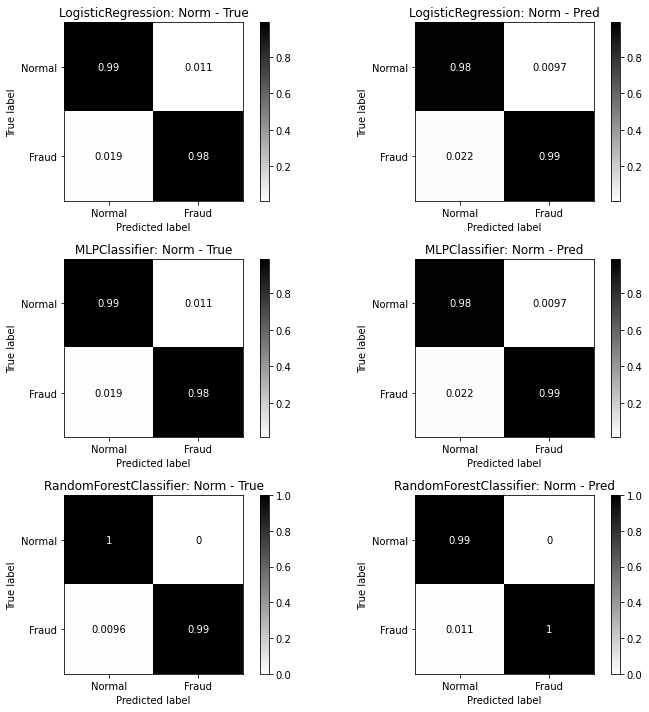

In [ ]:
cls = [LR_tuned, MLP_tuned, RF_tuned]

# add labels to confusion matrix
target_labels = ['Normal', 'Fraud']

fig, axs = plt.subplots(nrows=len(cls), ncols=2, figsize=(10, 10))

for i, ax in enumerate(axs):
  plot_confusion_matrix(cls[i], 
                    X_test, 
                    y_test, 
                    ax=ax[0],
                    display_labels=target_labels, 
                    cmap=plt.cm.binary,
                    normalize='true',
                    # colorbar=False, 
                    values_format = '.2g')
  ax[0].title.set_text(f"{str(cls[i][1]).partition('(')[0]}: Norm - True")

  plot_confusion_matrix(cls[i], 
                    X_test, 
                    y_test, 
                    ax=ax[1],
                    display_labels=target_labels, 
                    cmap=plt.cm.binary,
                    normalize='pred',
                    # colorbar=False, 
                    values_format = '.2g')
  ax[1].title.set_text(f"{str(cls[i][1]).partition('(')[0]}: Norm - Pred")

plt.tight_layout()  
plt.show()

Finally, before we select a model to be delvevrd to Keepsafe Family Bank, we can take a look at each model's ROC/AUC curve. While AUC is a good comparitive measure, again, with such simiar pefromances between our three candidate models, we are most likely left to chose a model based on efficiency.

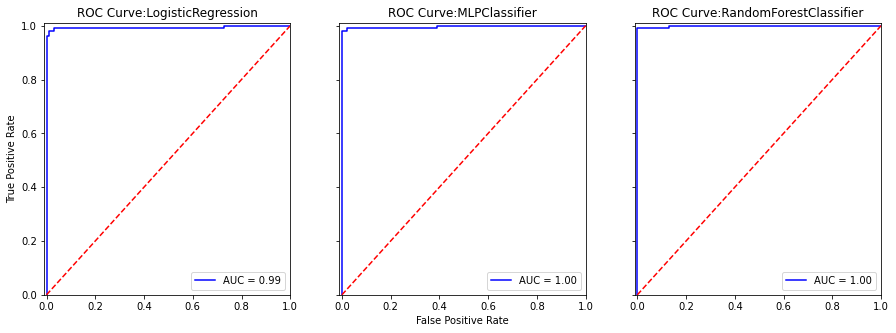

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=len(cls), figsize=(15, 5), sharex=True, sharey=True)

for i in range(len(cls)):
  y_scores = cls[i].predict_proba(X_test)
  fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
  roc_auc = auc(fpr, tpr)

  # plt.title('Receiver Operating Characteristic')
  axs[i].plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  axs[i].legend(loc = 'lower right')
  axs[i].plot([0, 1], [0, 1],'r--')
  plt.xlim([-.01, 1])
  plt.ylim([0, 1.01])
  axs[i].set_title(f"ROC Curve:{str(cls[i][1]).partition('(')[0]}")

axs[0].set_ylabel('True Positive Rate')
axs[1].set_xlabel('False Positive Rate')
plt.show()

## <b>8. Final Recommendation: Best Model - Logistic Regression</b>

### 8.1 Technical Analysis of Results
 
Based on the metrics and modeling process above, we recommend the Logistic Regression model to deliver Keepsafe Family Bank's desired results.
<br />
<br />
Our final logistic regression model is unlikely to suffer from overfitting. Not only do logistic regression models resist overfitting by nature, our use of crossfold validation also serves to prevent overfitting.
<br />
<br />
Crossfold validation helps prevent overfitting by slicing the data into various train and test folds. A model will have more difficulty overfitting when the data it is trained and tested on changes with each fold. Additionally, our model’s final test scores align closely with the scores generated by the cross validation process.
<br />
<br />
We are fortunate that the logistic regression model is also simple and computationally inexpensive, additionally with few parameters to test. Even with Grid Search and crossfold validation, the model is quick to train. Should more data become available, logistic regression would also prove efficient on a larger dataset, contrasting the more accurate but also far more expensive Random Forest model.
<br />
<br />
While decision trees are highly interpretable, random forests are far more difficult to grasp in terms of feature importance. The same can be said for Multilayer Perceptrons. Should Keepsafe Family Bank want further interpretation of feature importance to the model we delivered, Logistic Regression is somewhat transparent when examining the coefficients of each feature in the trained model.

### 8.2 Analysis of Business Implications

Keepsafe Family Bank's conditions require a model that delivers a true positive rate greater than 90% in order to meet budgetary requirements of \$50k at \$10k per false negative. Our model meets that requirement with a 98% true positive rate for instances of fraud. Further, a positive predictive value of 70% or greater was necessary in order to meet budgetary requirements of \$30k at \$1k per false positive. We exceeded that requirement as well, with a precision of 98% for normal transactions.
<br />
<br />
Given the competitive performance of each candidate model, we selected a final candidate, Logistic Regression, with growth, retraining, and interpretability in mind. It is a simple model, efficient, and with an available method for interpretation.


## <b>9. Conclusion</b>

### 9.1 Accomplishments
 
Our final model exceeded the required performance goals and the results confirm that the model also performs under-budget. The project further succeeded in our selected model's ability to scale. Because of the feature reduction via noise and synonym filtering as well as our model's proven ability to work on data undersampled to the positive, fraud class, should more data become available, the model can be refitted in a reasonable amount of time on a larger dataset.
<br />
<br />
The nested GridSearchCV process also proved helpful not only in hyperparameter tuning, but in helping to prevent overfitting. The models' final test performance aligned well with what we expected in evaluating the crossfold test performance.
<br />
<br />
Although it also performs well, I would not consider the RF a complete success, considering the computational time required to build the model. Should buget, time, and the size of the dataset allow, it may be consiered a competitive option.
<br />
<br />
We would also consider our choice to test a MLP unsuccessful considering it's equal performance to a simpler, less computationally expensive model.
<br />
<br />
On a more specific note in terms of failure, we did not succeed in outlier removal in the alloted time. Although we did explore outliers, we abandoned removal in favor of testing performance with outliers present.
<br />
<br />
One final point of concern that I recognize is that, while not perfect, my models' scores seem suspiciously high. It may be that the size of the undersampled data set is too small or that I did indeed overfit. On one hand, the final models performed well on an untouched test segment of our dataset. On the other hand, that test set only accounts for 20% of the data and may be too small for an accurate evaluation given our balanced dataset is just under 1000 observations. It is also possible that the randomly selected test set includes mostly values that lie at favorable values. As our pairplots show, normal transactions cluster quite tightly together in many feature relationships. Perhaps our test set coincidentally favored normal transactions at the core of that cluster and fraud transactions far from those normal transactions.

### 9.2 Reflection

If I were to revisit the project, there are three specific sections that I would approach differently:

* **Outlier Removal** - I would begin with more detailed research and implementation of outlier detection. As the IQR method for outlier detection identified a large percentage of our Fraud class as outliers (indicating that fraud itself is an outlying behaviour), what method might be more sensitive to our class distribution? Can we use IQR to remove outliers in this dataset by performing it on a class-by-class basis, removing instances of outliers as they relate to Fraud and again as they relate to Normal, independently? 

  Our fraud-labeled datapoints themselves may be outliers in relation to non fraudulent cases, but we can remove outliers relative to each individual class.

* **Balancing** - Secondly, I would explore a more robust balancing strategy. We may be able to artificially increase the size of our dataset with a combination of oversampling the positive class and undersampling the negative class.

* **Model Selection** - Finally, following a successful Logistic Regression model—implying linear separability—with an MLP, I believe, was a mistake.


### 9.3 Future Work
Seeing the success of our logistic regression model, there are a few areas of further work that I would consider:
* **Feature Mapping** - Exploration into feature mapping may be beneficial to my model. Do functions and more complex relationships between specific features in this dataset help to better inform the models? Feature mapping may help Logistic Regression approach more complex relationships between the features.
* **Feature Selection** - Given the success of my models with the features I did select, I would experiment further with more aggressive filtering. Perhaps I could use even fewer features for similar results.
* **Advanced Separability** - Rather than exploring the separability of the features with pairplots, I would like to look into the use of algorithms to determine linear separability, such as perceptron or SVM.
* **2-Model Problem Solving** - One strategy I am curious about is to build two models—one with strong recall performance and one with strong precision and passing data through both. First, recall model, then the precision model.
 
* **Additional Testing** - I would like to train, retrain and test the model on different segments of our Train, Test, Split data in order to alleviate concern that the holdout test set is a favorable selection of observations.